<a href="https://colab.research.google.com/github/dtabuena/Floxed_APOE/blob/main/Floxed_APOE_Run_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',             
            'Pipeline_Wrapper.ipynb'
            'fun_math.ipynb',
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            'Pipeline_Wrapper.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 20.3 MB/s 
Cloning into 'EphysLib'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 562 (delta 179), reused 170 (delta 125), pack-reused 307
Receiving objects: 100% (562/562), 8.95 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (353/353), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 786 kB/s 


ERROR:root:File `'/content/EphysLib/Pipeline_Wrapper.ipynbfun_math.ipynb.py'` not found.


In [2]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s',
           'VC - 3min GapFree',
           'I0 - 3min GapFree']

--2022-12-09 17:47:40--  https://www.dropbox.com/sh/x4mmoozuo0dp1ed/AAB5Nz3_vSg3wqnfqwgrjNGKa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /sh/raw/x4mmoozuo0dp1ed/AAB5Nz3_vSg3wqnfqwgrjNGKa [following]
--2022-12-09 17:47:40--  https://www.dropbox.com/sh/raw/x4mmoozuo0dp1ed/AAB5Nz3_vSg3wqnfqwgrjNGKa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc17b1d107e53f53c88be163de7.dl.dropboxusercontent.com/zip_download_get/BVsmCM0RJwNaTEQAFIy6XH0SIBbBu2Hbk3rJHp1UdhwPvo9WnGsgZaGu2M0MKs6UY8fgwRuICdiK_osmS92hkFm6NLgGi0BFal6hkQ84RlKnMQ# [following]
--2022-12-09 17:47:41--  https://ucc17b1d107e53f53c88be163de7.dl.dropboxusercontent.com/zip_download_get/BVsmCM0RJwNaTEQAFIy6XH0SIBbBu2Hbk3rJHp1UdhwPvo9WnGsgZaGu2M0MKs6UY8fgwRuICdiK_osmS92hkFm6NLgG

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'spike_thresh': 20, 'high_dv_thresh': 50, 'low_dv_thresh': -30, 'window_ms': 2}


  0%|          | 0/260 [00:00<?, ?it/s]

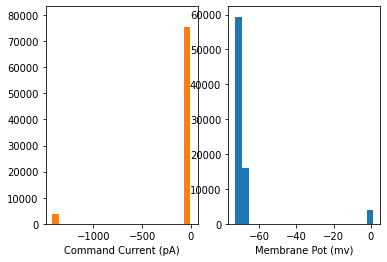

  0%|          | 1/260 [00:00<01:29,  2.89it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s001_c001_CA3_0001.abf
analysis failed


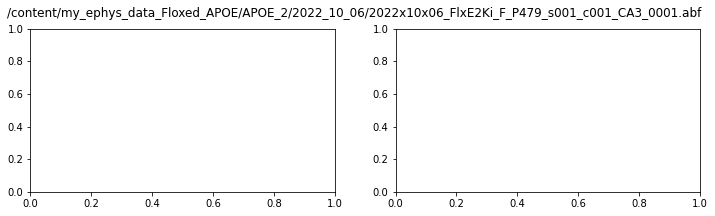

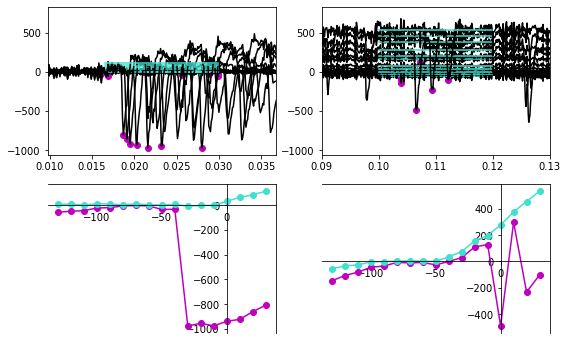

  2%|▏         | 4/260 [00:02<03:34,  1.20it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s001_c001_CA3_0003.abf
analysis failed


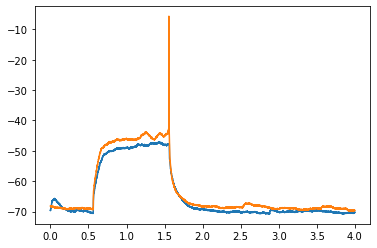

  2%|▏         | 6/260 [00:03<02:20,  1.81it/s]

no spikes found
no spikes found


  3%|▎         | 7/260 [00:04<03:15,  1.30it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s001_c001_CA3_0007.abf
analysis failed


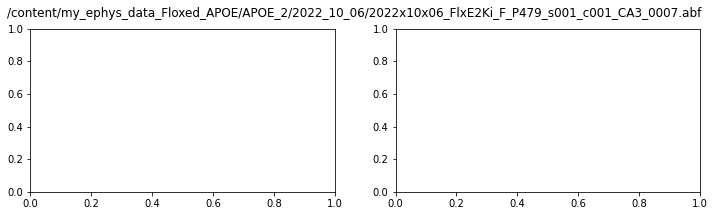

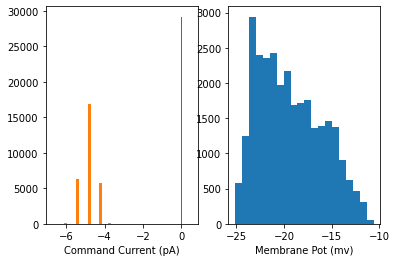

  3%|▎         | 9/260 [00:05<02:10,  1.92it/s]

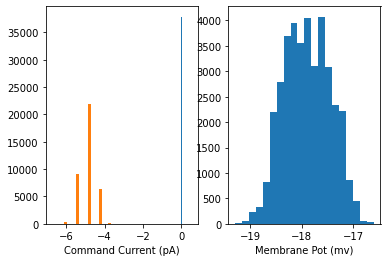

  4%|▍         | 10/260 [00:05<01:58,  2.12it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s002_c002_CA3_0001.abf
analysis failed


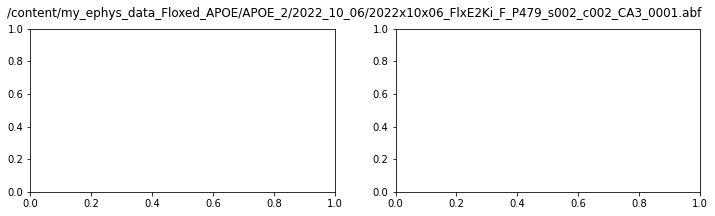

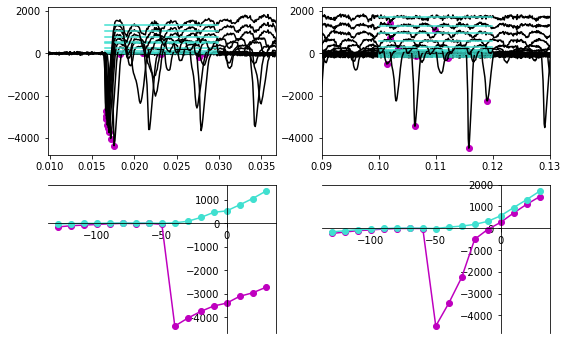

  5%|▍         | 12/260 [00:06<02:02,  2.03it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s002_c002_CA3_0004.abf
analysis failed


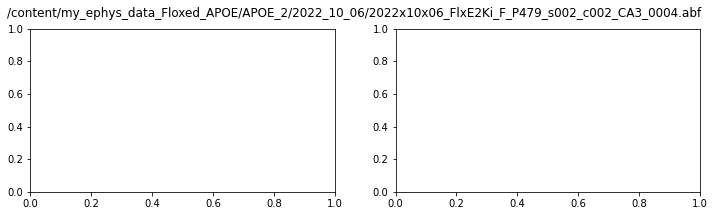

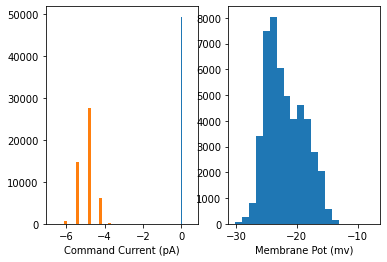

  6%|▌         | 15/260 [00:08<02:35,  1.58it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s002_c002_CA3_0007.abf
analysis failed


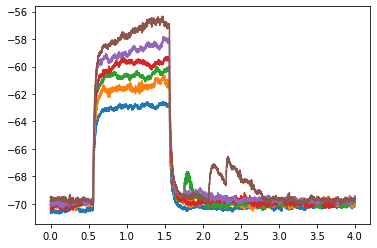

  6%|▌         | 16/260 [00:09<02:57,  1.37it/s]

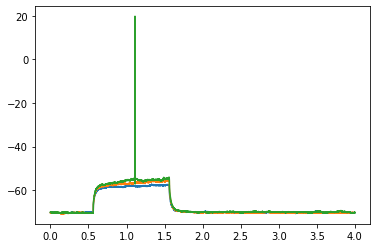

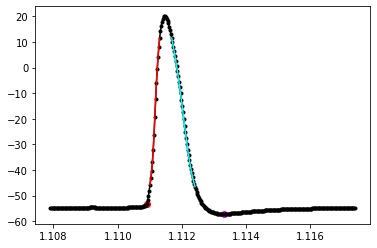

  7%|▋         | 17/260 [00:12<04:34,  1.13s/it]

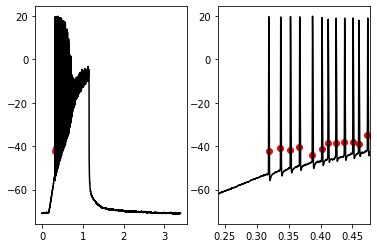

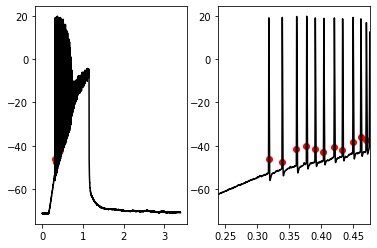

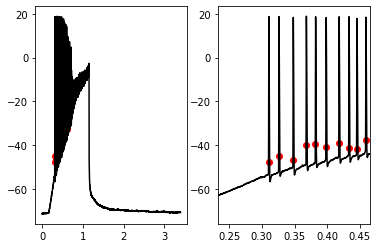

  7%|▋         | 19/260 [00:14<04:25,  1.10s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s002_c002_CA3_0012.abf
analysis failed


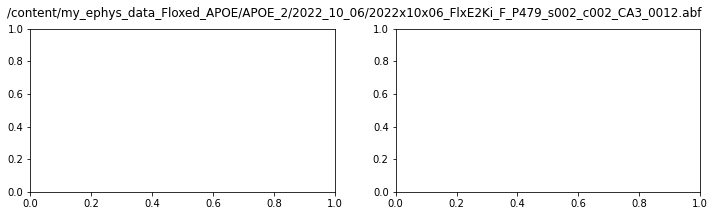

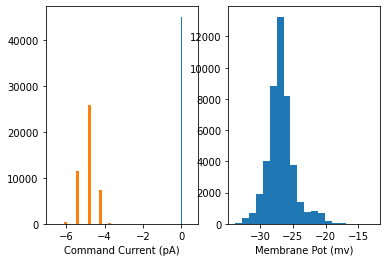

  8%|▊         | 21/260 [00:14<02:57,  1.34it/s]

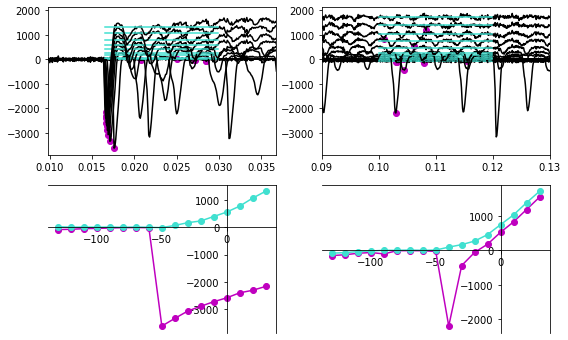

  8%|▊         | 22/260 [00:15<02:59,  1.33it/s]

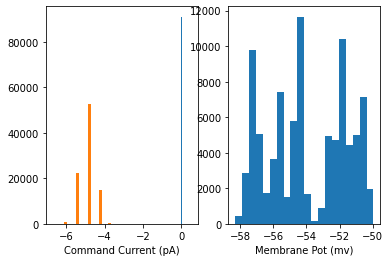

  9%|▉         | 23/260 [00:15<02:31,  1.56it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c003_CA3_0001.abf
analysis failed


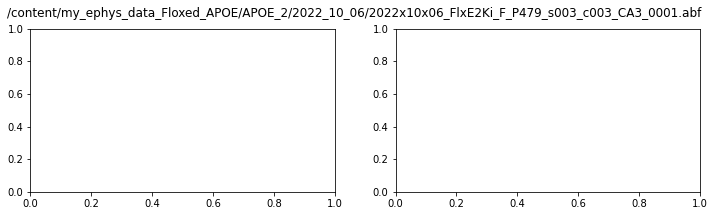

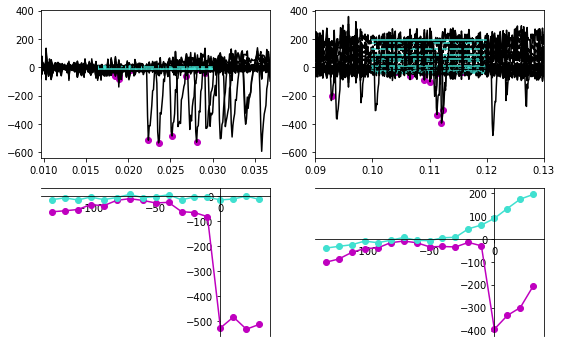

 10%|█         | 26/260 [00:18<03:05,  1.26it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c003_CA3_0003.abf
analysis failed


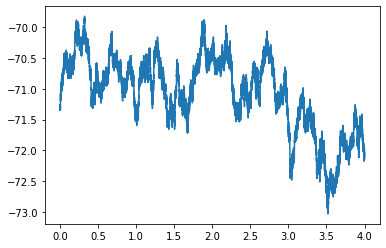

 11%|█         | 28/260 [00:20<03:25,  1.13it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c003_CA3_0005.abf
analysis failed


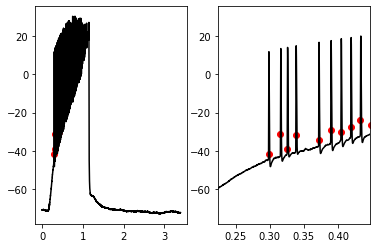

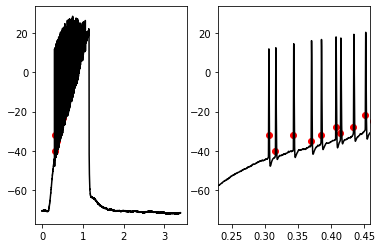

 12%|█▏        | 31/260 [00:21<02:49,  1.35it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c003_CA3_0009.abf
analysis failed


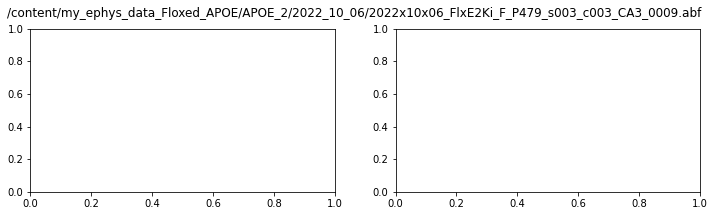

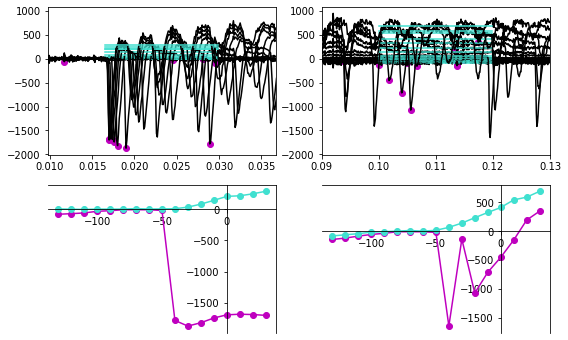

 13%|█▎        | 33/260 [00:22<02:24,  1.57it/s]

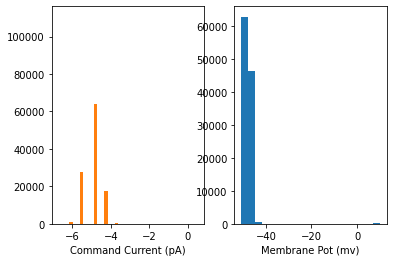

 13%|█▎        | 34/260 [00:23<02:08,  1.76it/s]

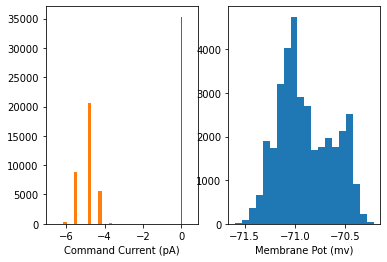

 13%|█▎        | 35/260 [00:23<01:59,  1.89it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c004_CA3_0001.abf
analysis failed


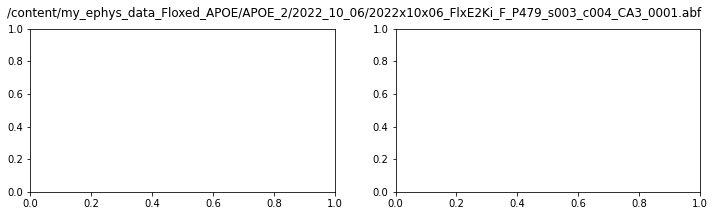

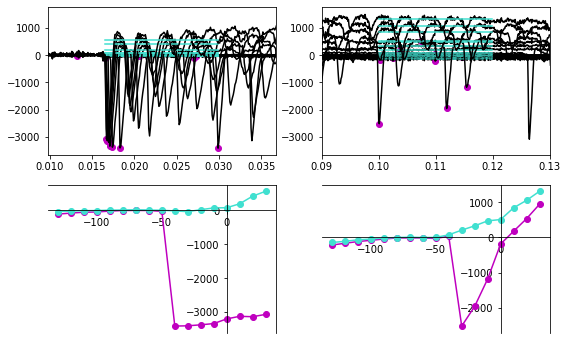

 15%|█▍        | 38/260 [00:26<02:42,  1.37it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c004_CA3_0003.abf
analysis failed


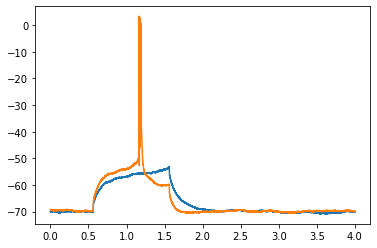

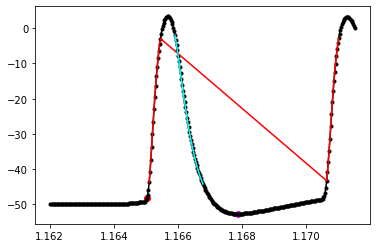

 15%|█▌        | 39/260 [00:28<04:06,  1.12s/it]

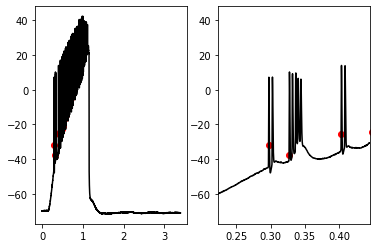

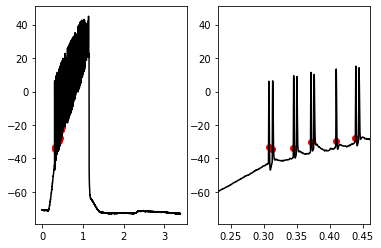

 16%|█▌        | 41/260 [00:30<03:41,  1.01s/it]

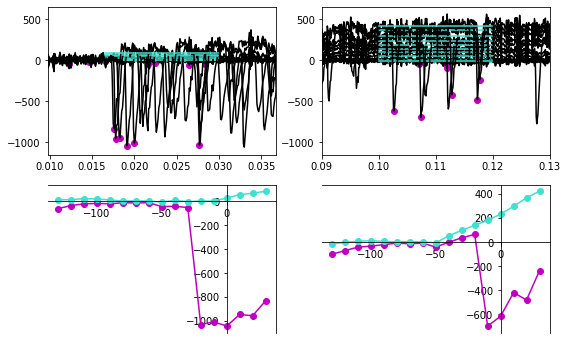

 16%|█▌        | 42/260 [00:30<03:31,  1.03it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c004_CA3_0008.abf
analysis failed


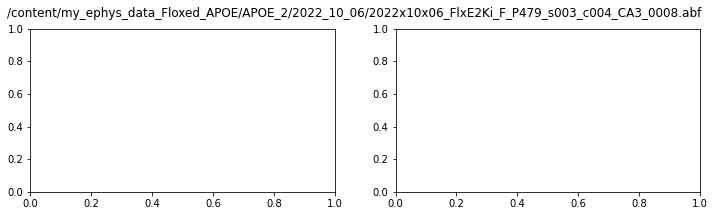

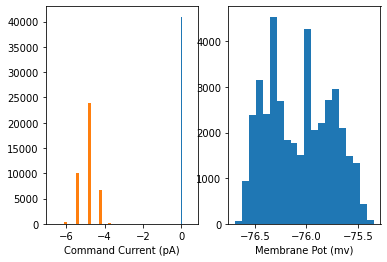

 17%|█▋        | 44/260 [00:31<02:22,  1.52it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c005_CA3_0001.abf
analysis failed


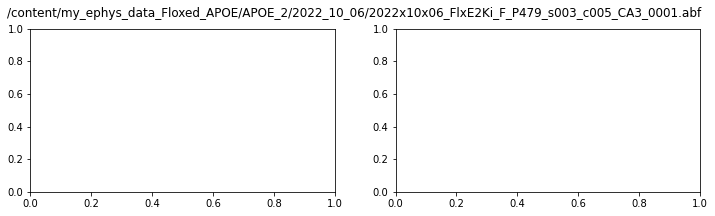

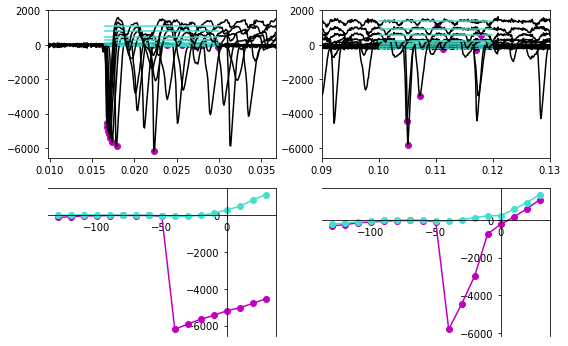

 18%|█▊        | 47/260 [00:33<02:48,  1.27it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c005_CA3_0003.abf
analysis failed


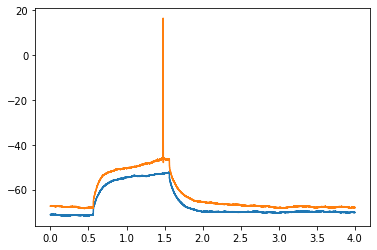

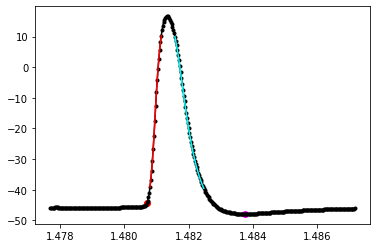

 18%|█▊        | 48/260 [00:36<03:56,  1.12s/it]

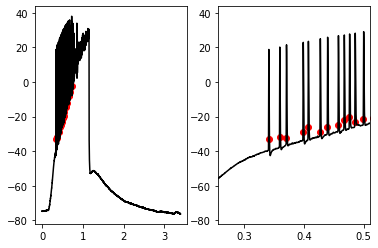

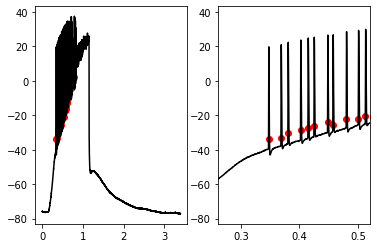

 19%|█▉        | 50/260 [00:38<03:38,  1.04s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c005_CA3_0007.abf
analysis failed

 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c005_CA3_0008.abf
analysis failed


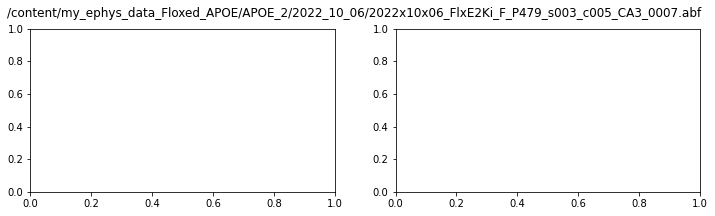

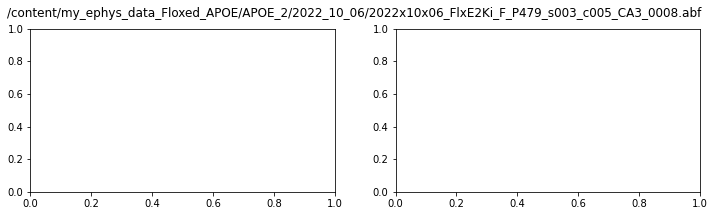

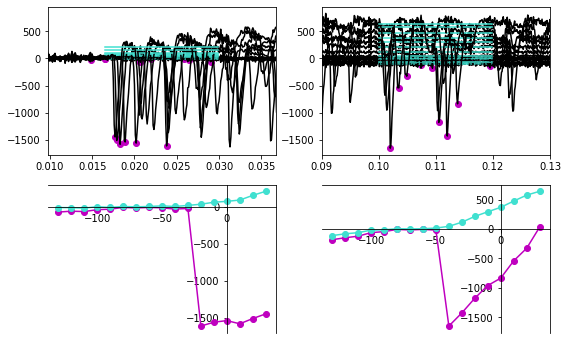

 20%|██        | 53/260 [00:39<02:23,  1.45it/s]

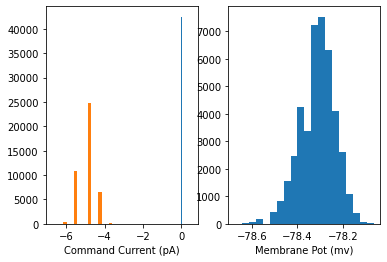

 21%|██        | 54/260 [00:39<02:07,  1.62it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c006_CA3_0001.abf
analysis failed


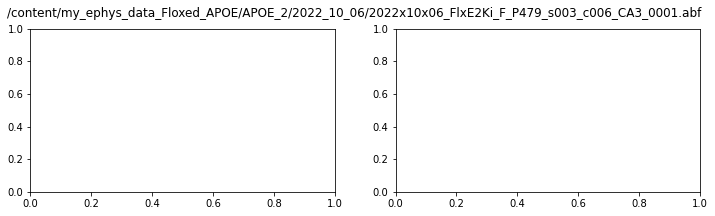

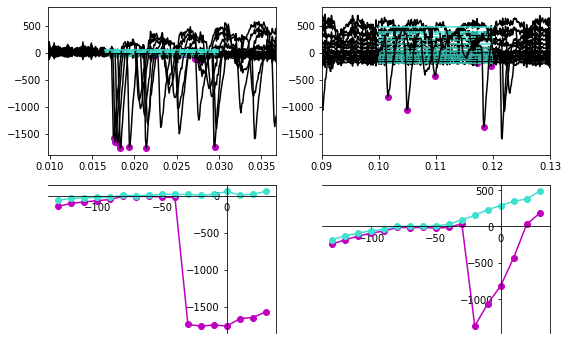

 22%|██▏       | 57/260 [00:42<02:51,  1.18it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c006_CA3_0004.abf
analysis failed


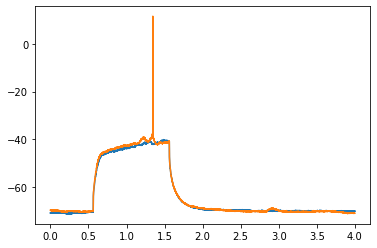

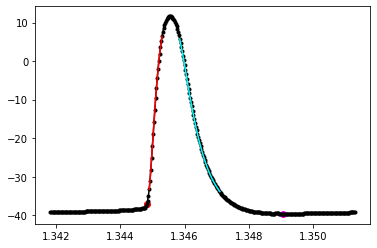

 22%|██▏       | 58/260 [00:44<03:52,  1.15s/it]

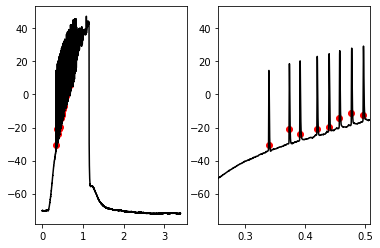

 23%|██▎       | 60/260 [00:46<03:13,  1.03it/s]

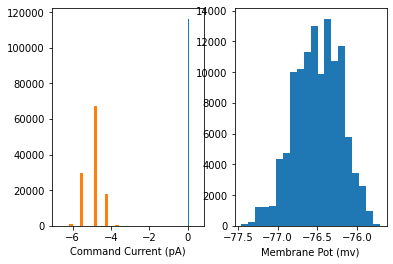

 23%|██▎       | 61/260 [00:46<02:37,  1.26it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c007_CA3_0001.abf
analysis failed


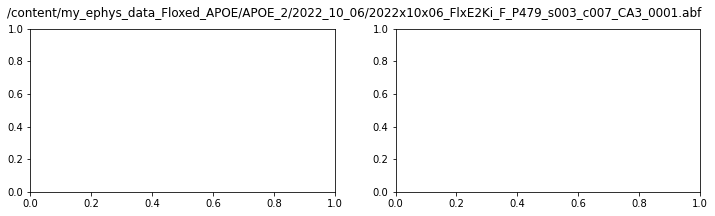

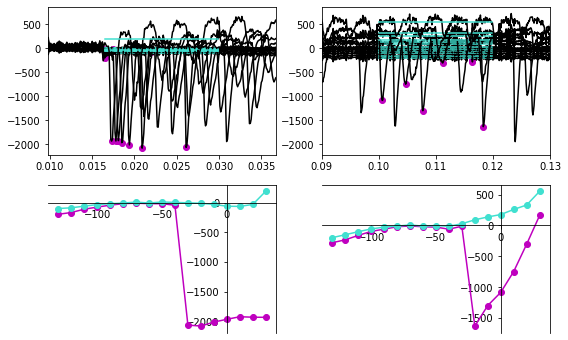

 25%|██▍       | 64/260 [00:48<02:51,  1.14it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c007_CA3_0003.abf
analysis failed


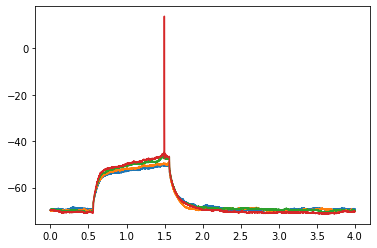

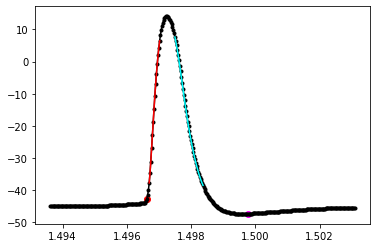

 25%|██▌       | 65/260 [00:51<04:09,  1.28s/it]

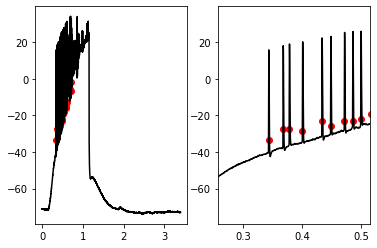

 25%|██▌       | 66/260 [00:51<03:22,  1.04s/it]

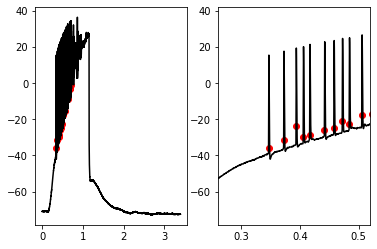

 26%|██▌       | 68/260 [00:53<02:52,  1.11it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_06/2022x10x06_FlxE2Ki_F_P479_s003_c007_CA3_0008.abf
analysis failed


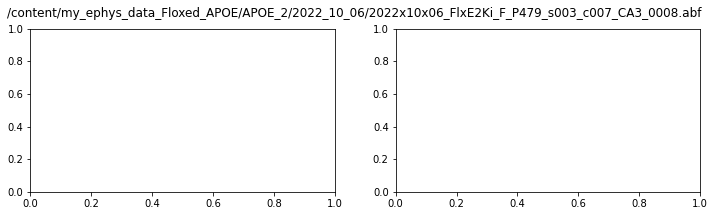

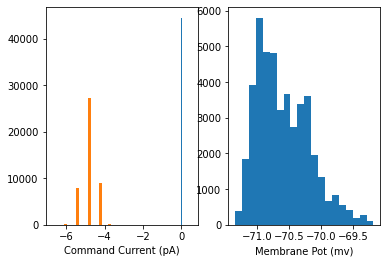

 27%|██▋       | 70/260 [00:53<01:56,  1.64it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s001_c001_CA3_0001.abf
analysis failed


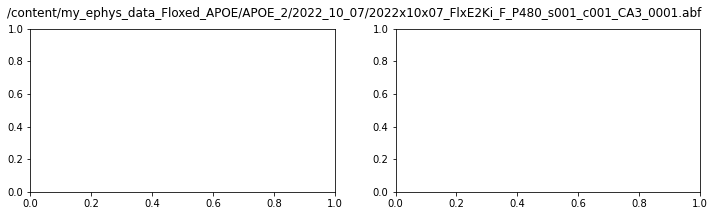

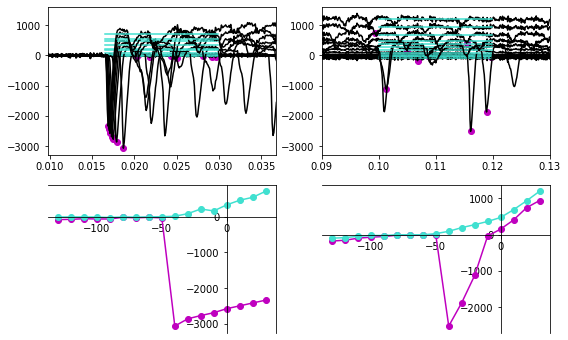

 28%|██▊       | 73/260 [00:56<02:25,  1.28it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s001_c001_CA3_0003.abf
analysis failed


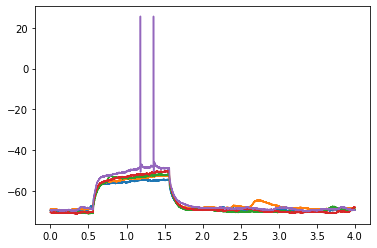

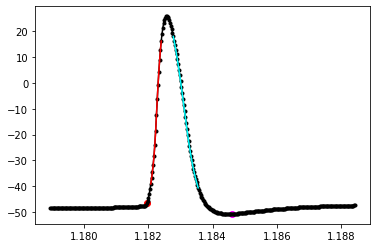

 28%|██▊       | 74/260 [00:58<03:45,  1.21s/it]

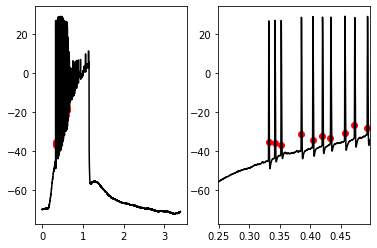

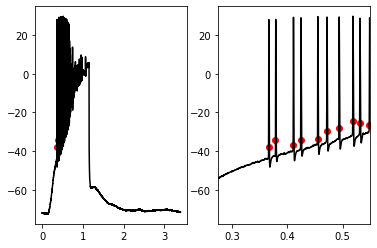

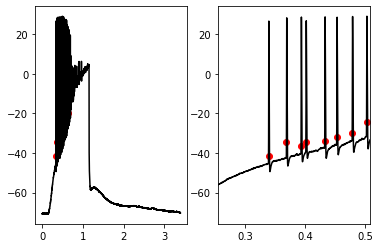

 29%|██▉       | 76/260 [01:00<03:29,  1.14s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s001_c001_CA3_0007.abf
analysis failed


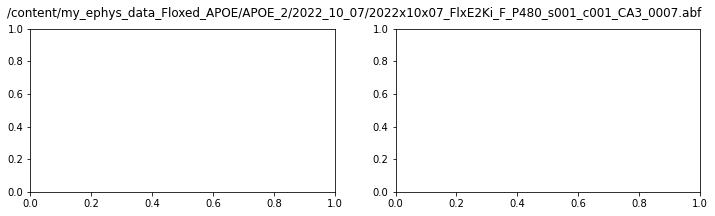

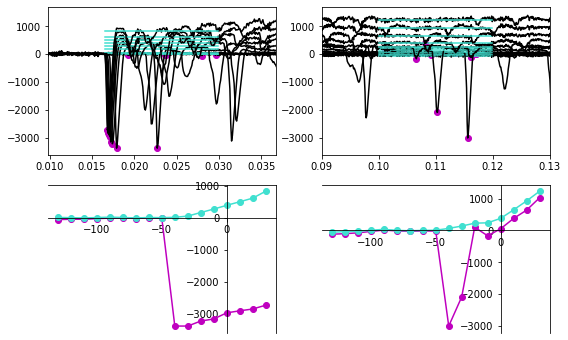

 30%|███       | 78/260 [01:01<02:39,  1.14it/s]

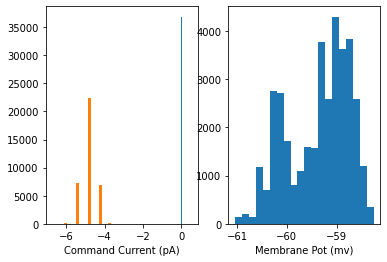

 30%|███       | 79/260 [01:02<02:14,  1.35it/s]

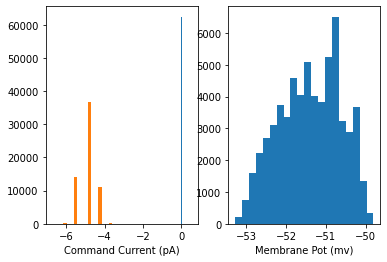

 31%|███       | 80/260 [01:02<01:54,  1.57it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s001_c002_CA3_0001.abf
analysis failed


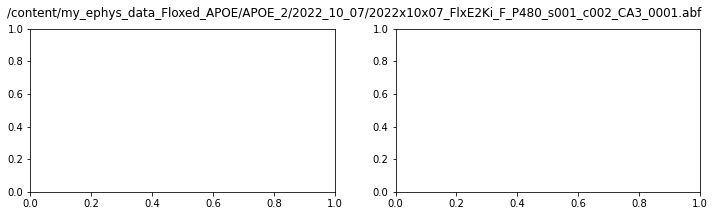

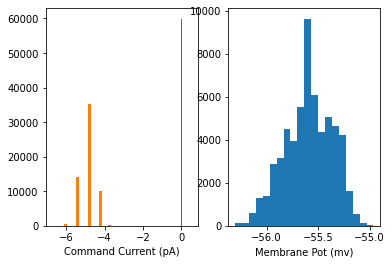

 32%|███▏      | 82/260 [01:03<01:25,  2.08it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s001_c003_CA3_0001.abf
analysis failed


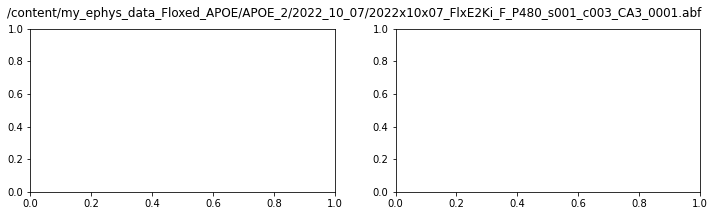

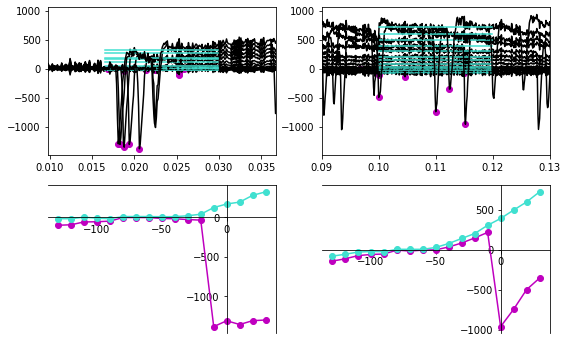

 33%|███▎      | 85/260 [01:05<02:04,  1.40it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s001_c003_CA3_0003.abf
analysis failed


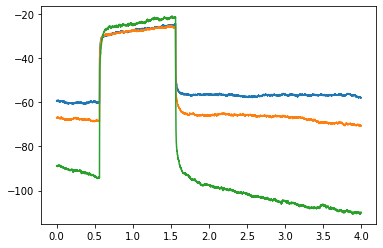

 33%|███▎      | 86/260 [01:06<01:59,  1.45it/s]

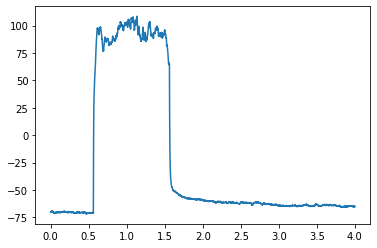

 33%|███▎      | 87/260 [01:06<01:37,  1.77it/s]

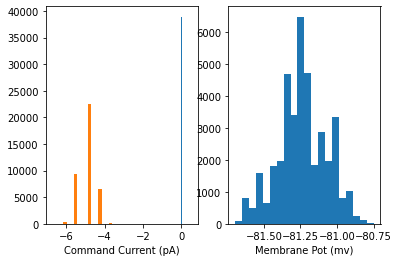

 34%|███▍      | 88/260 [01:06<01:27,  1.98it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s002_c004_CA3_0003.abf
analysis failed


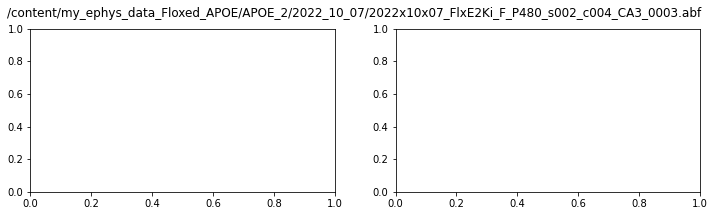

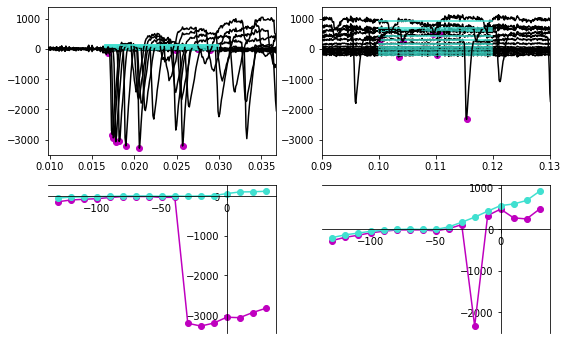

 35%|███▌      | 91/260 [01:09<02:04,  1.35it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s002_c004_CA3_0005.abf
analysis failed


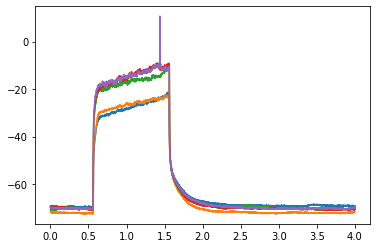

 35%|███▌      | 92/260 [01:10<02:10,  1.29it/s]

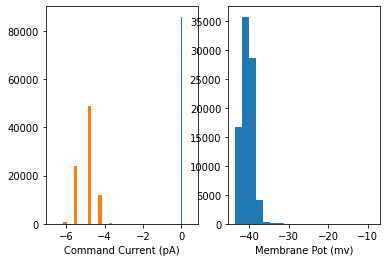

 36%|███▌      | 93/260 [01:10<01:52,  1.48it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c005_CA3_0001.abf
analysis failed


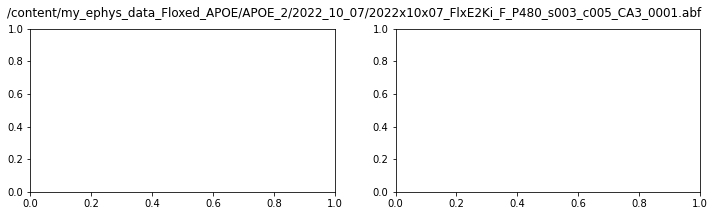

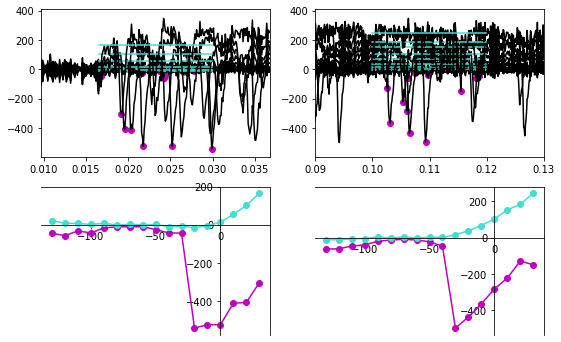

 37%|███▋      | 96/260 [01:11<01:20,  2.04it/s]

no spikes found


 38%|███▊      | 98/260 [01:14<02:10,  1.24it/s]

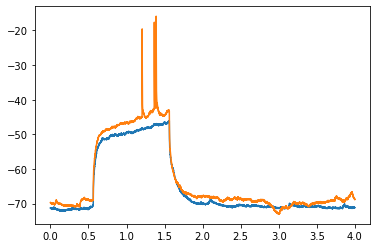

 38%|███▊      | 99/260 [01:14<01:54,  1.41it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c005_CA3_0007.abf
analysis failed


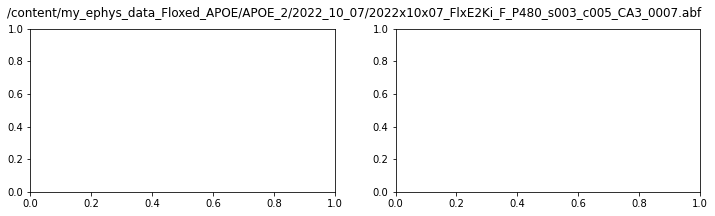

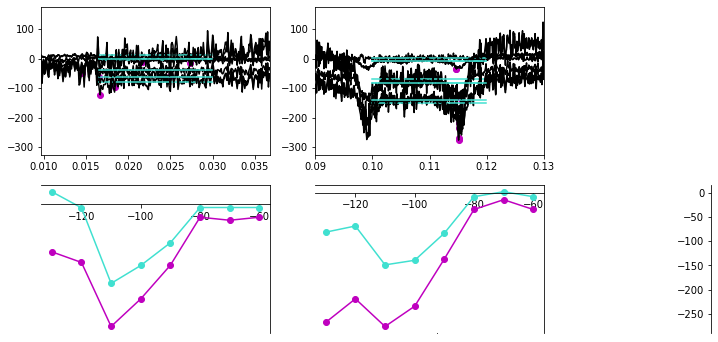

 39%|███▉      | 101/260 [01:15<01:35,  1.66it/s]

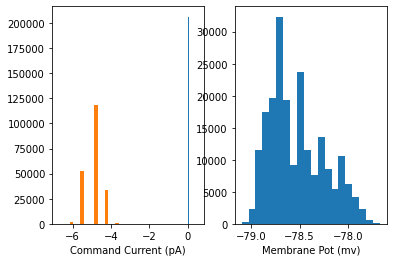

 39%|███▉      | 102/260 [01:16<01:28,  1.79it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c006_CA3_0001.abf
analysis failed


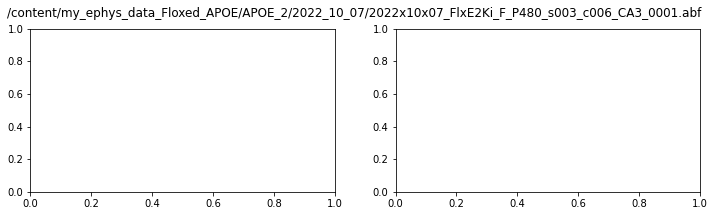

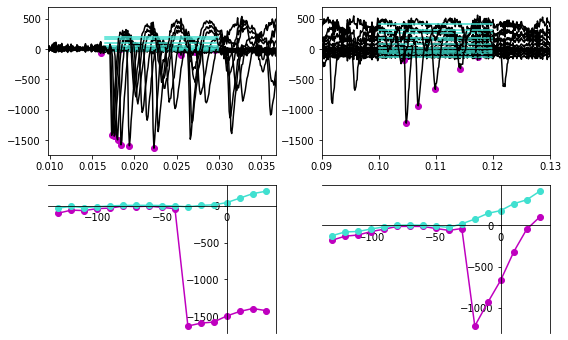

 40%|████      | 105/260 [01:18<01:56,  1.34it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c006_CA3_0003.abf
analysis failed


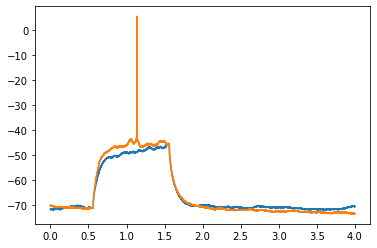

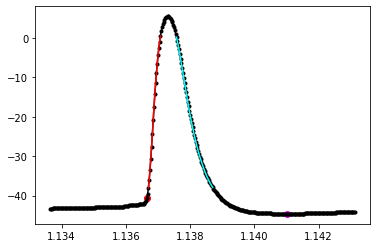

 41%|████      | 106/260 [01:20<02:49,  1.10s/it]

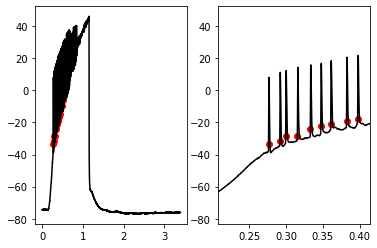

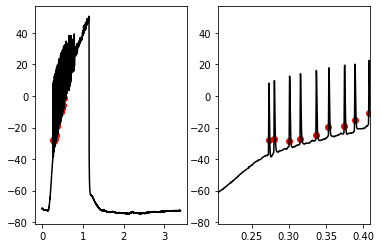

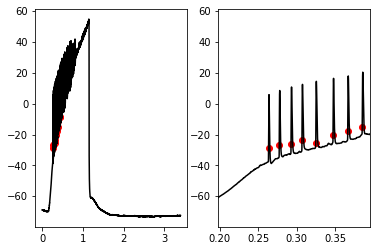

 42%|████▏     | 108/260 [01:23<02:49,  1.12s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c006_CA3_0007.abf
analysis failed


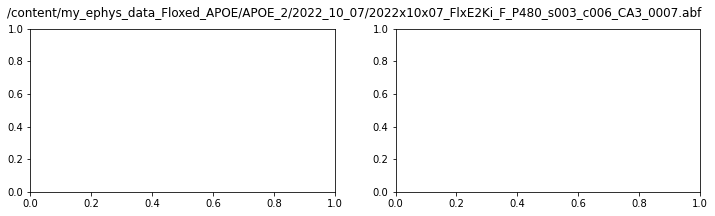

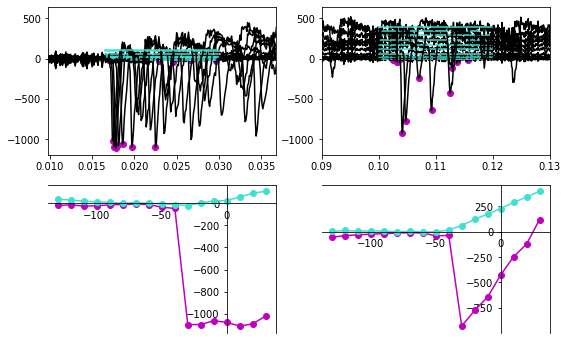

 42%|████▏     | 110/260 [01:24<02:07,  1.18it/s]

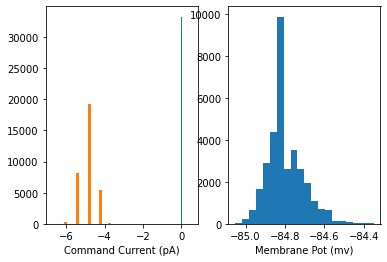

 43%|████▎     | 111/260 [01:24<01:48,  1.38it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c007_CA3_0001.abf
analysis failed


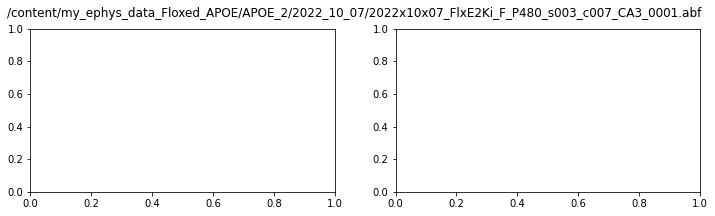

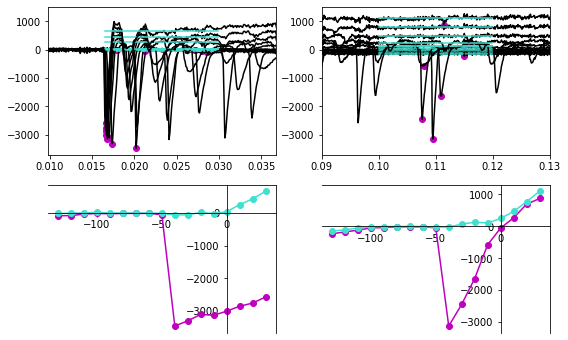

 44%|████▍     | 114/260 [01:26<02:00,  1.21it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c007_CA3_0003.abf
analysis failed


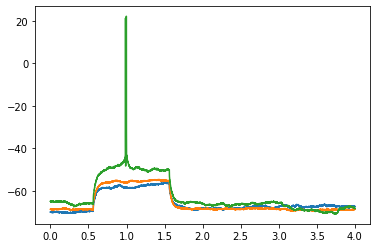

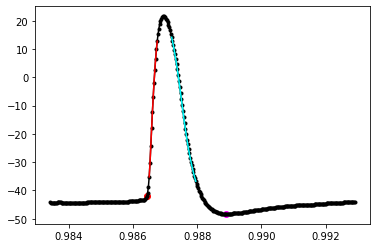

 44%|████▍     | 115/260 [01:29<02:57,  1.22s/it]

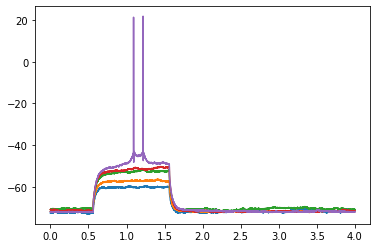

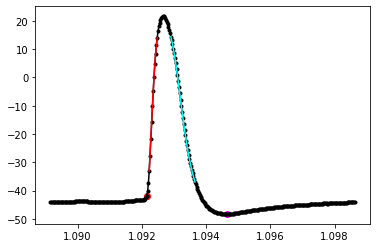

 45%|████▍     | 116/260 [01:31<03:47,  1.58s/it]

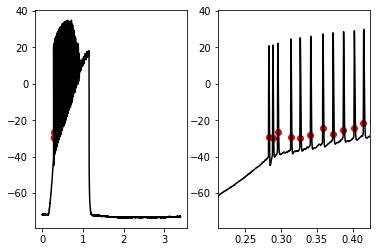

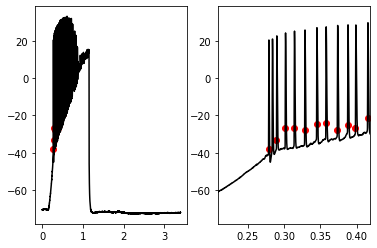

 45%|████▌     | 118/260 [01:33<03:00,  1.27s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_2/2022_10_07/2022x10x07_FlxE2Ki_F_P480_s003_c007_CA3_0008.abf
analysis failed


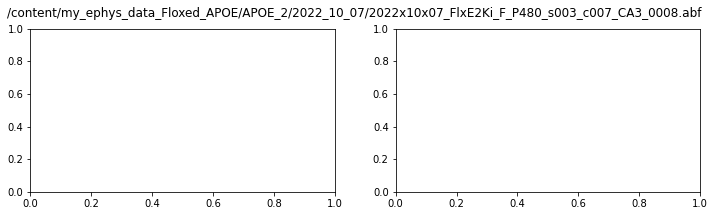

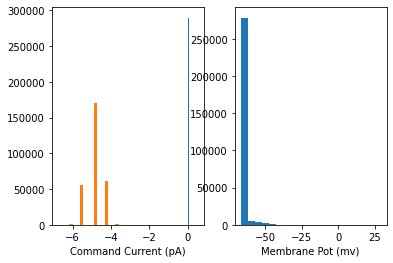

 46%|████▌     | 120/260 [01:34<01:55,  1.21it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_03/2022x10x03_FlxE4Ki_F_P464_s001_c001_CA3_0002.abf
analysis failed


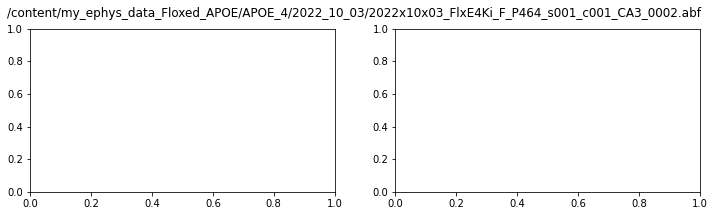

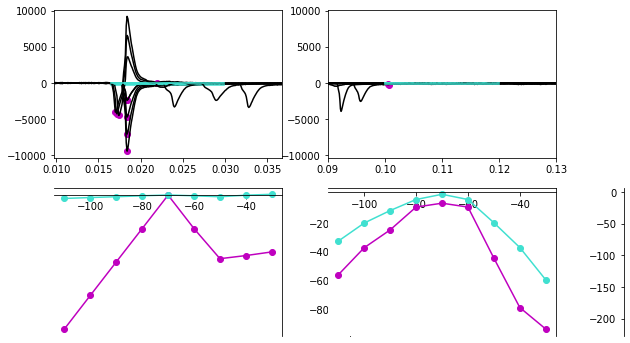

 47%|████▋     | 123/260 [01:36<01:46,  1.29it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_03/2022x10x03_FlxE4Ki_F_P464_s001_c001_CA3_0004.abf
analysis failed


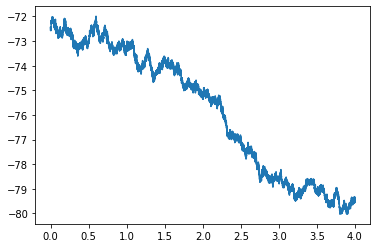

 48%|████▊     | 124/260 [01:36<01:27,  1.55it/s]

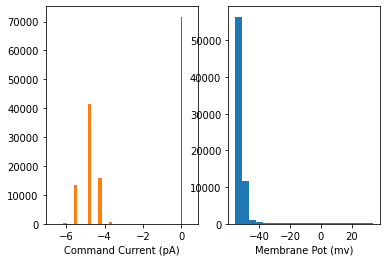

 48%|████▊     | 125/260 [01:36<01:16,  1.77it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_03/2022x10x03_FlxE4Ki_F_P464_s001_c002_CA3_0002.abf
analysis failed


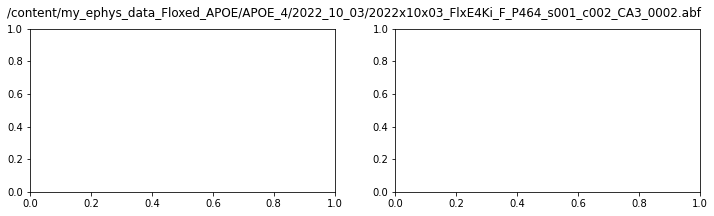

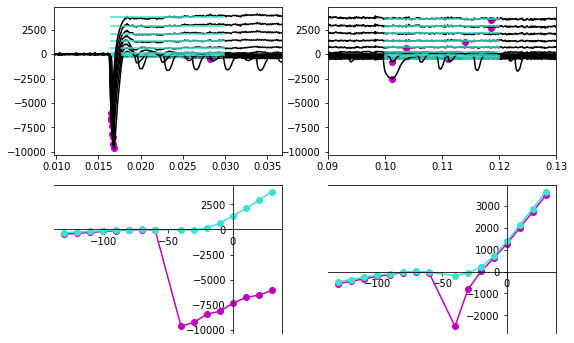

 50%|████▉     | 129/260 [01:38<01:03,  2.07it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_03/2022x10x03_FlxE4Ki_F_P464_s001_c002_CA3_0005.abf
analysis failed


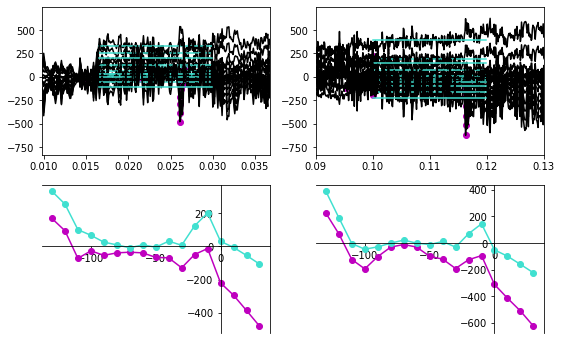

 50%|█████     | 130/260 [01:39<01:14,  1.74it/s]

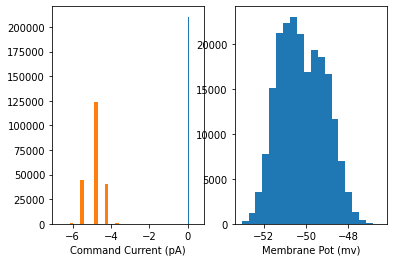

 50%|█████     | 131/260 [01:39<01:06,  1.94it/s]

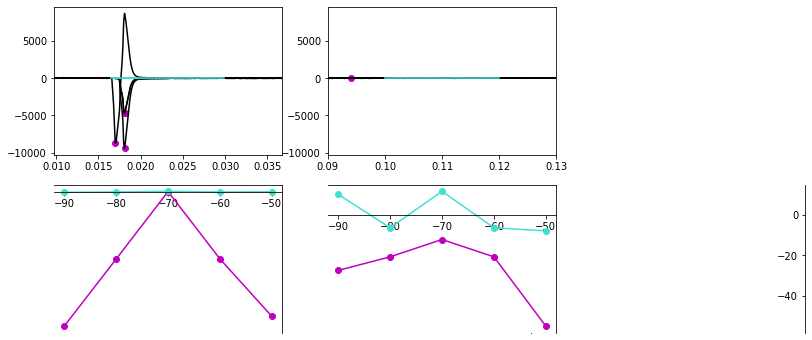

 51%|█████     | 133/260 [01:42<01:43,  1.23it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c001_CA3_0003.abf
analysis failed


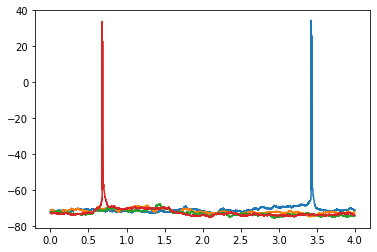

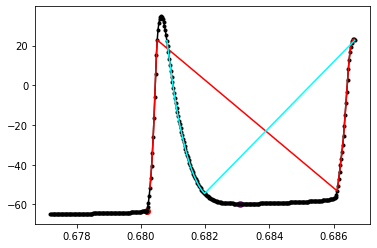

 52%|█████▏    | 135/260 [01:45<02:32,  1.22s/it]

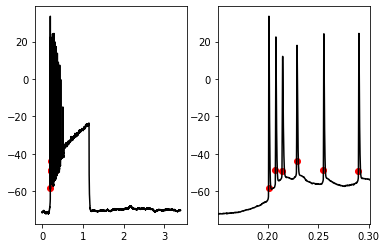

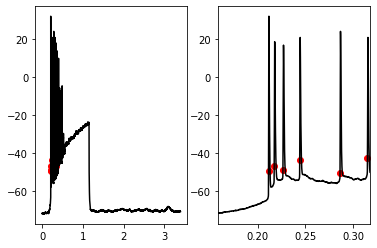

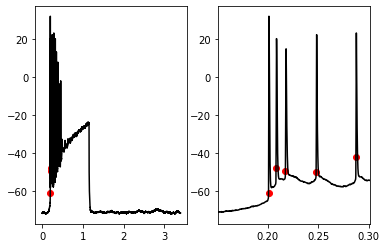

 52%|█████▏    | 136/260 [01:46<02:30,  1.21s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c001_CA3_0008.abf
analysis failed


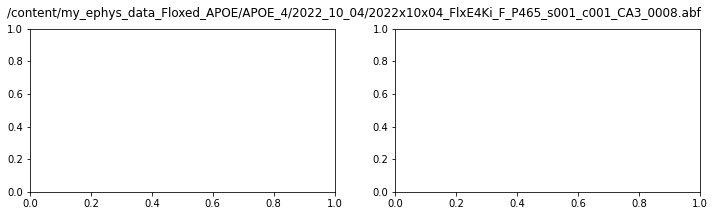

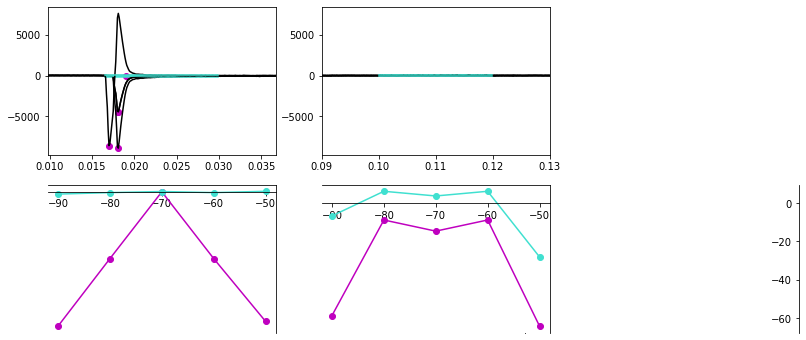

 53%|█████▎    | 139/260 [01:47<01:25,  1.41it/s]

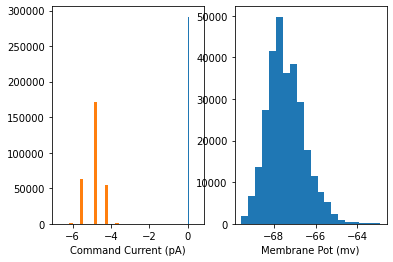

 54%|█████▍    | 140/260 [01:48<01:16,  1.56it/s]

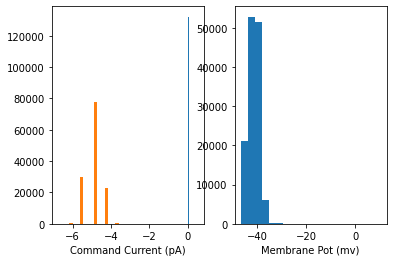

 54%|█████▍    | 141/260 [01:48<01:08,  1.74it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c002_CA3_0001.abf
analysis failed

 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c002_CA3_0002.abf
analysis failed


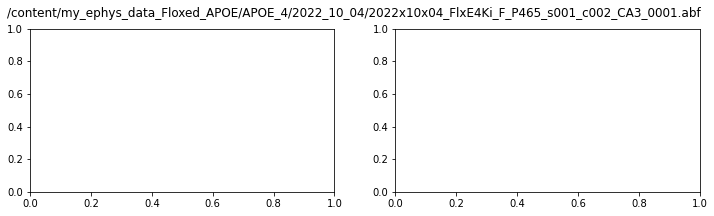

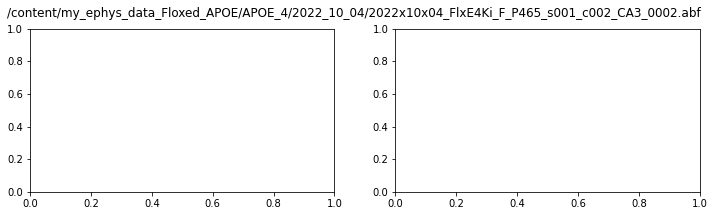

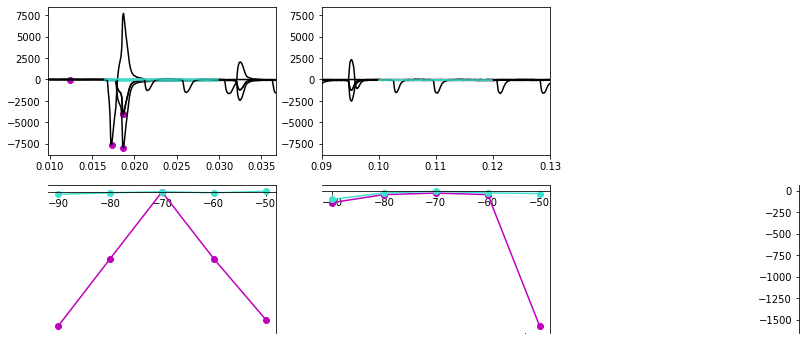

 55%|█████▌    | 144/260 [01:49<00:56,  2.06it/s]

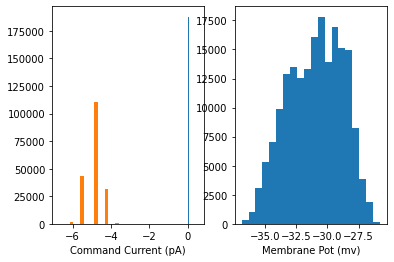

 56%|█████▌    | 146/260 [01:50<00:43,  2.61it/s]

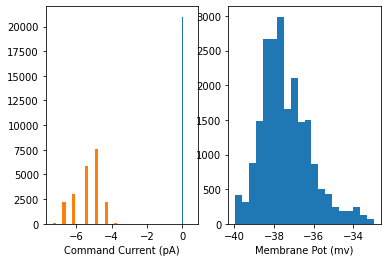

 57%|█████▋    | 147/260 [01:50<00:42,  2.66it/s]

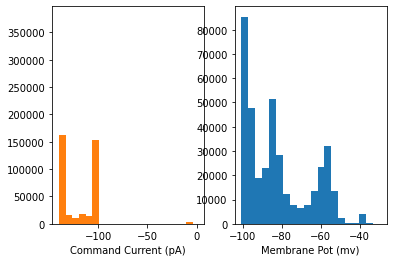

 57%|█████▋    | 148/260 [01:50<00:41,  2.69it/s]

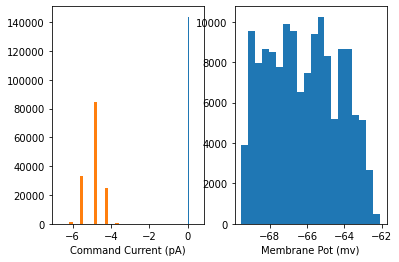

 57%|█████▋    | 149/260 [01:51<00:40,  2.73it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c002_CA3_0009.abf
analysis failed


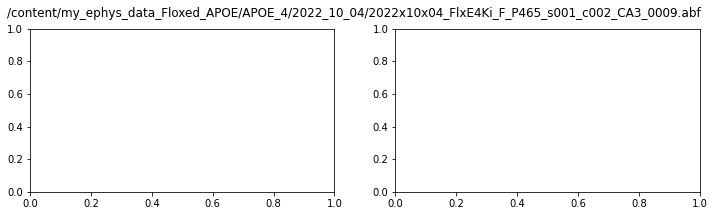

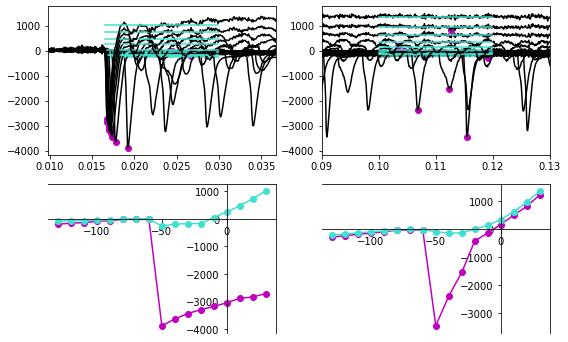

 58%|█████▊    | 152/260 [01:53<01:02,  1.72it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c002_CA3_0011.abf
analysis failed


 59%|█████▉    | 154/260 [01:54<00:57,  1.83it/s]

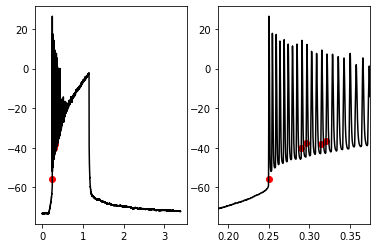

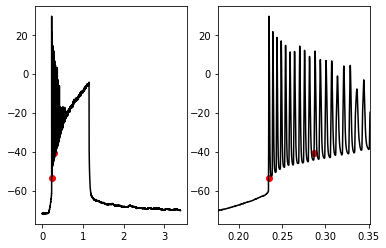

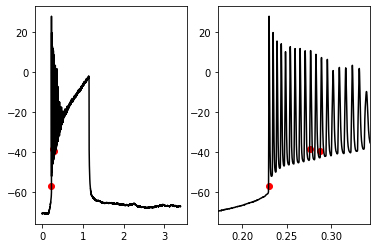

 60%|█████▉    | 155/260 [01:55<01:10,  1.49it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c002_CA3_0015.abf
analysis failed

 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_04/2022x10x04_FlxE4Ki_F_P465_s001_c002_CA3_0016.abf
analysis failed


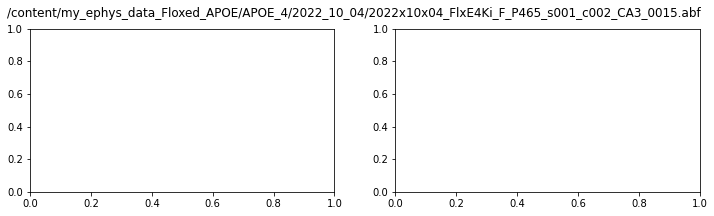

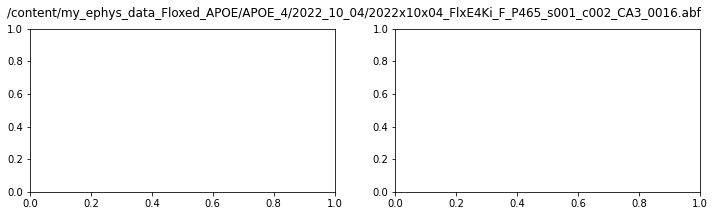

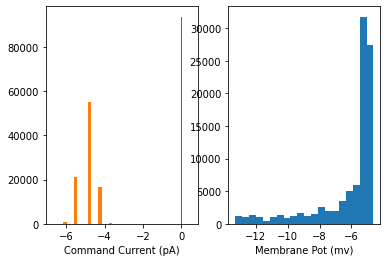

 61%|██████    | 158/260 [01:56<00:47,  2.14it/s]

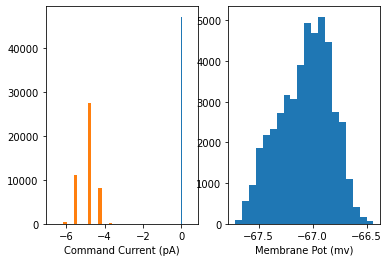

 61%|██████    | 159/260 [01:56<00:46,  2.19it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s001_c001_CA3_0001.abf
analysis failed


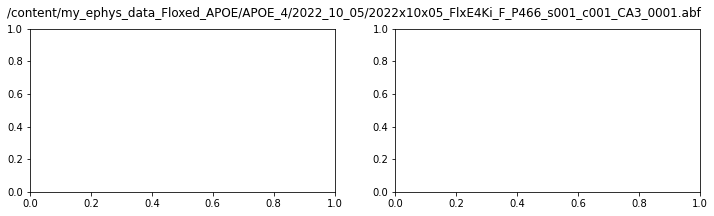

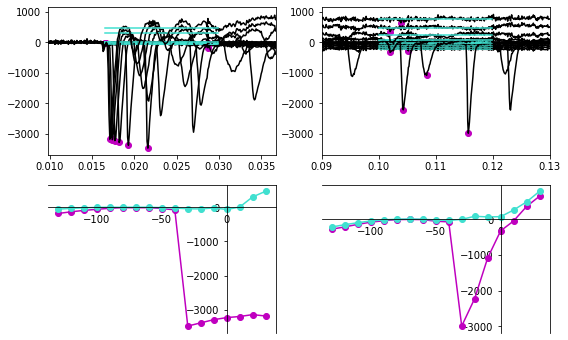

 62%|██████▏   | 162/260 [01:59<01:06,  1.47it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s001_c001_CA3_0003.abf
analysis failed


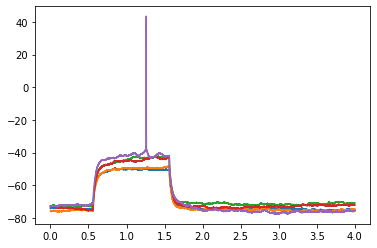

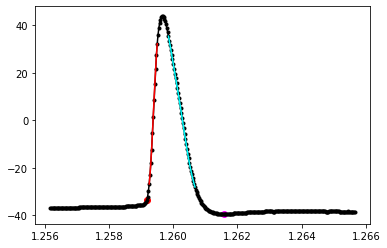

 63%|██████▎   | 163/260 [02:01<01:48,  1.12s/it]

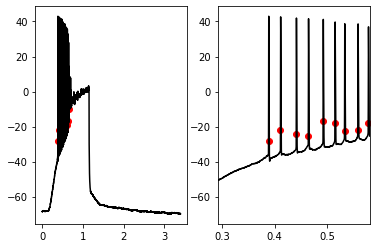

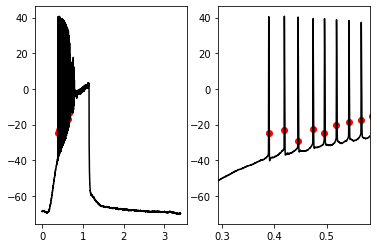

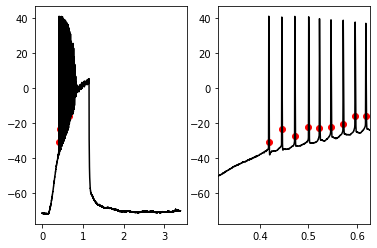

 63%|██████▎   | 165/260 [02:03<01:44,  1.10s/it]

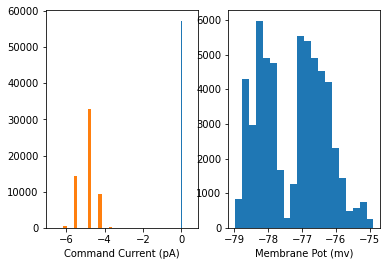

 64%|██████▍   | 166/260 [02:04<01:26,  1.09it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s001_c002_CA3_0001.abf
analysis failed


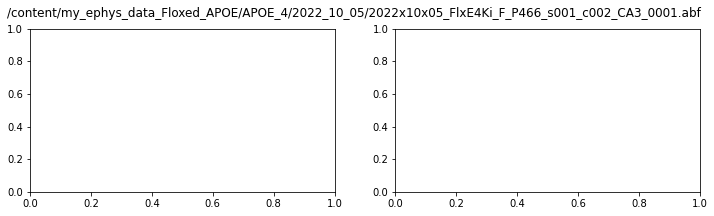

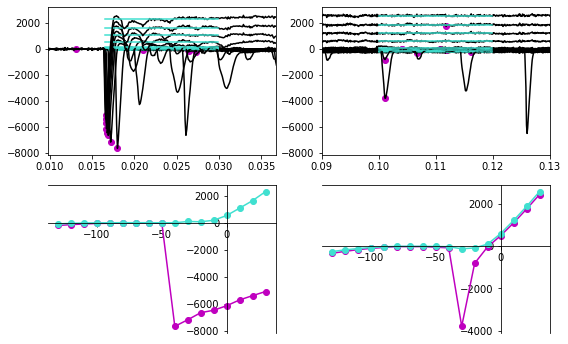

 65%|██████▌   | 169/260 [02:06<01:24,  1.08it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s001_c002_CA3_0003.abf
analysis failed


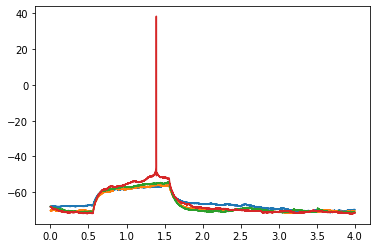

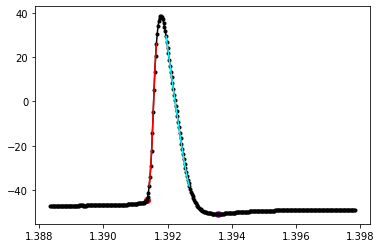

 65%|██████▌   | 170/260 [02:09<01:58,  1.32s/it]

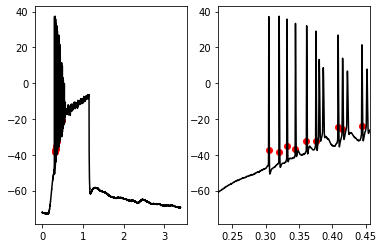

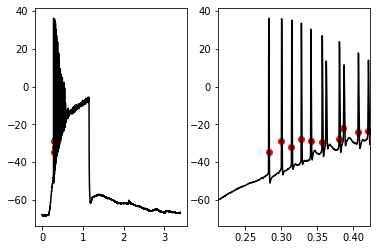

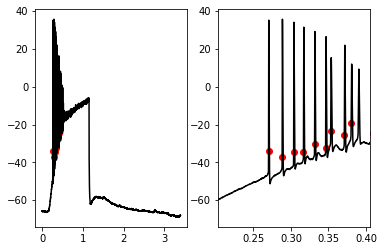

 66%|██████▌   | 172/260 [02:11<01:47,  1.23s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s001_c002_CA3_0007.abf
analysis failed


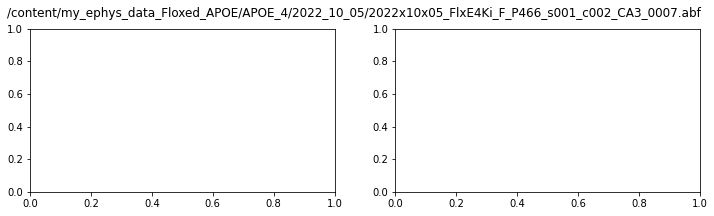

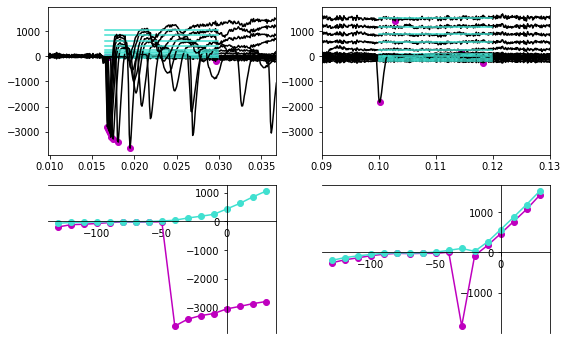

 67%|██████▋   | 174/260 [02:12<01:17,  1.11it/s]

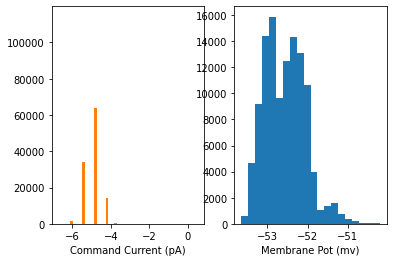

 67%|██████▋   | 175/260 [02:12<01:05,  1.30it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c003_CA3_0001.abf
analysis failed


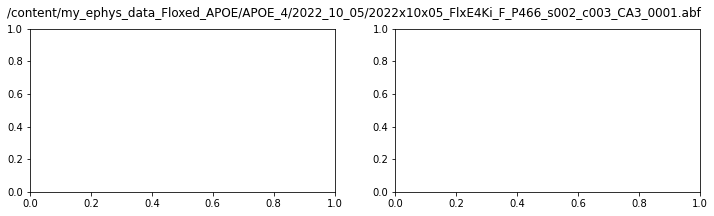

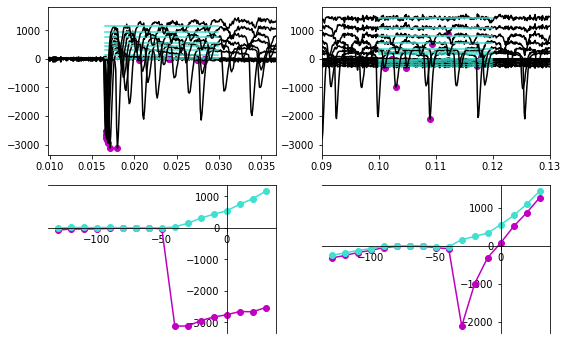

 68%|██████▊   | 178/260 [02:15<01:10,  1.17it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c003_CA3_0003.abf
analysis failed


 69%|██████▉   | 179/260 [02:16<01:14,  1.09it/s]

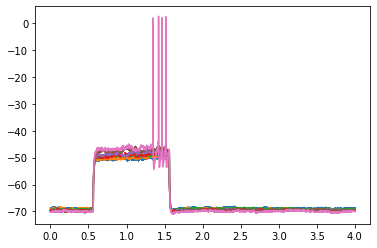

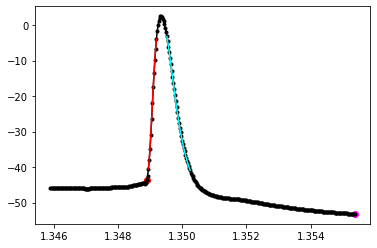

 69%|██████▉   | 180/260 [02:19<01:55,  1.44s/it]

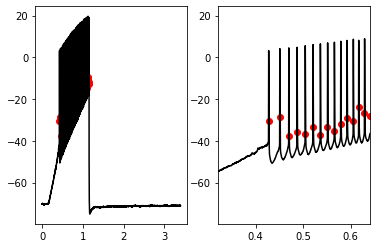

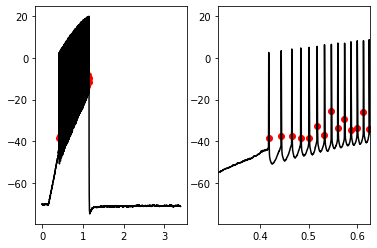

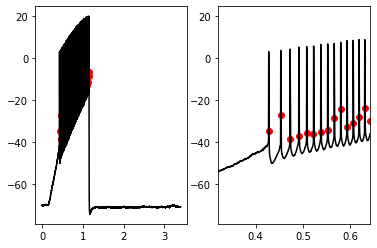

 70%|██████▉   | 181/260 [02:20<01:47,  1.36s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c003_CA3_0007.abf
analysis failed


 70%|███████   | 183/260 [02:23<01:48,  1.41s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c003_CA3_0008.abf
analysis failed


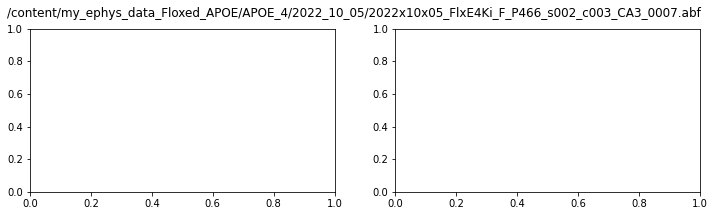

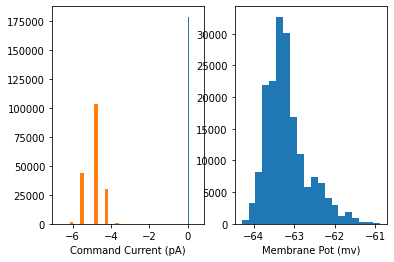

 71%|███████   | 184/260 [02:24<01:34,  1.24s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c004_CA3_0001.abf
analysis failed


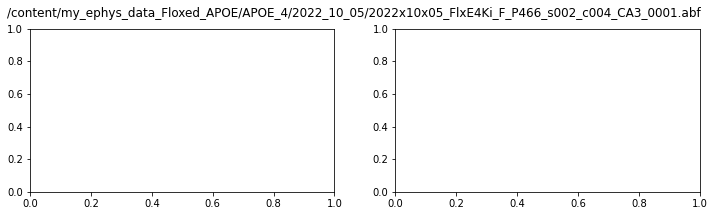

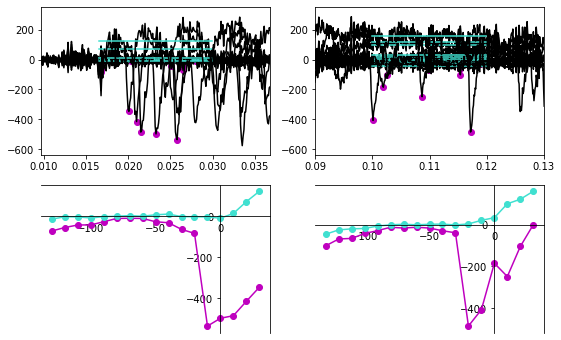

 72%|███████▏  | 188/260 [02:27<01:17,  1.08s/it]

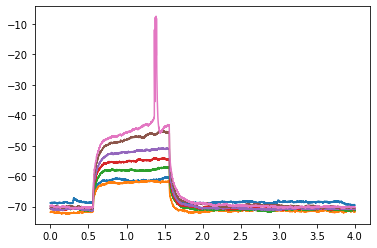

 73%|███████▎  | 190/260 [02:29<01:15,  1.08s/it]

no spikes found
no spikes found


 73%|███████▎  | 191/260 [02:30<01:00,  1.15it/s]

no spikes found


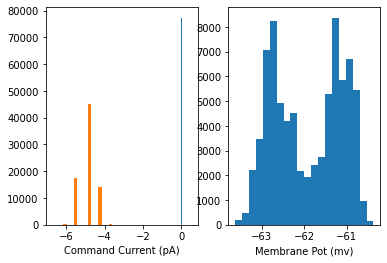

 74%|███████▍  | 192/260 [02:30<00:49,  1.37it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c005_CA3_0009.abf
analysis failed


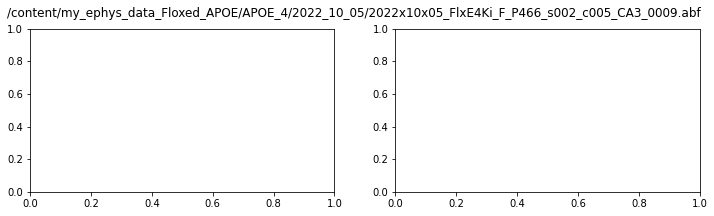

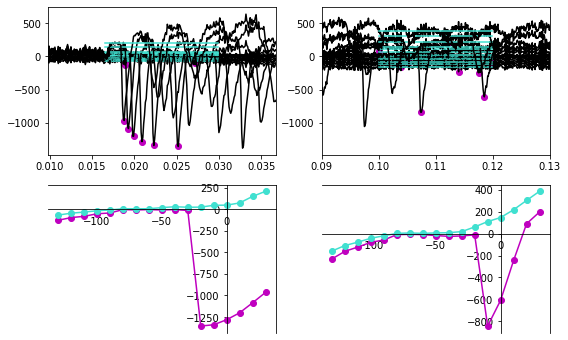

 75%|███████▌  | 195/260 [02:33<00:56,  1.16it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c005_CA3_0011.abf
analysis failed


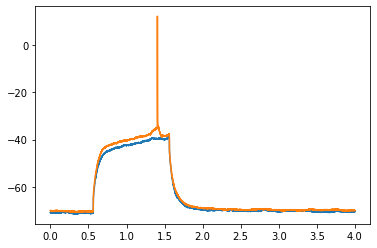

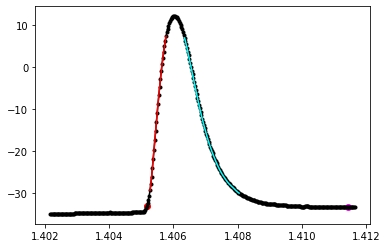

 75%|███████▌  | 196/260 [02:35<01:19,  1.24s/it]

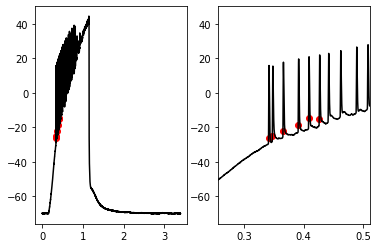

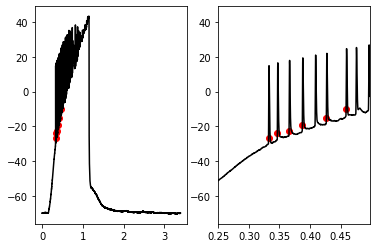

 76%|███████▌  | 198/260 [02:37<01:08,  1.10s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c005_CA3_0015.abf
analysis failed


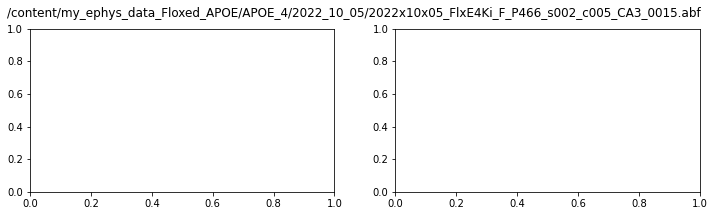

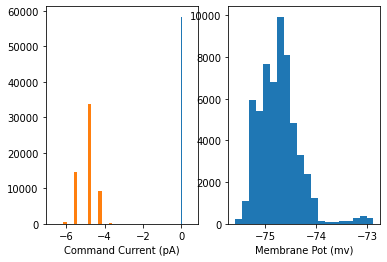

 77%|███████▋  | 200/260 [02:38<00:44,  1.36it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c006_CA3_0001.abf
analysis failed


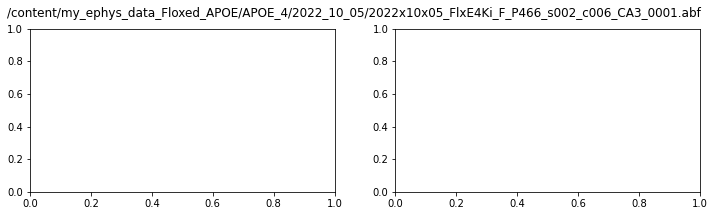

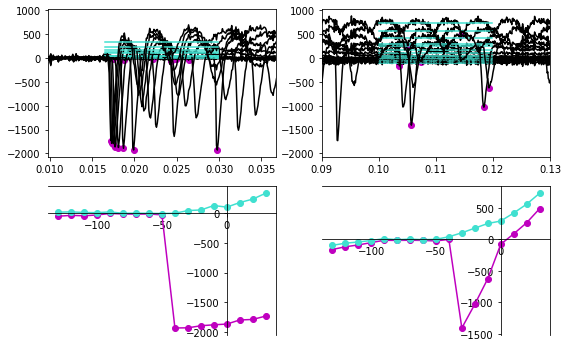

 78%|███████▊  | 203/260 [02:40<00:46,  1.23it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c006_CA3_0003.abf
analysis failed


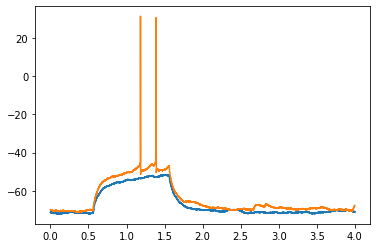

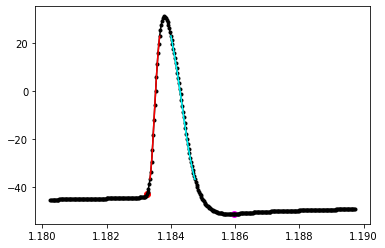

 78%|███████▊  | 204/260 [02:42<01:05,  1.16s/it]

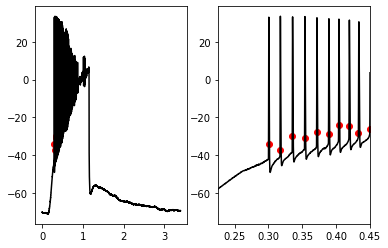

 79%|███████▉  | 206/260 [02:44<00:53,  1.00it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s002_c006_CA3_0007.abf
analysis failed


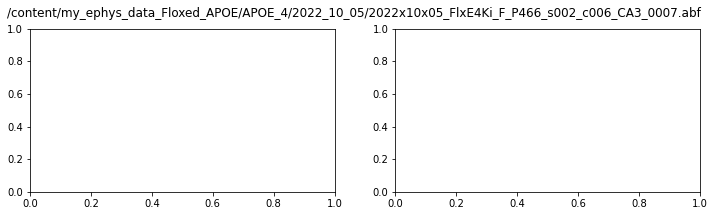

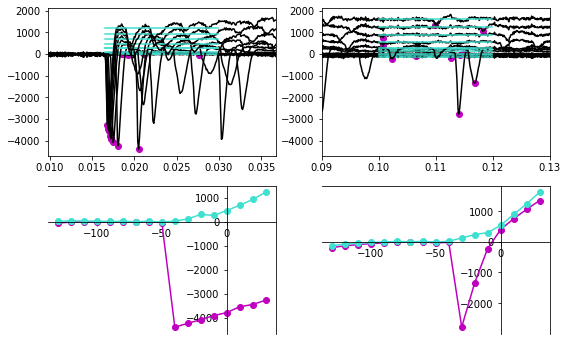

 80%|████████  | 208/260 [02:45<00:41,  1.27it/s]

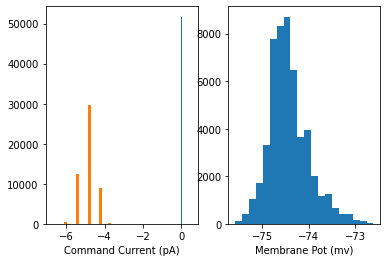

 80%|████████  | 209/260 [02:45<00:34,  1.47it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c007_CA3_0001.abf
analysis failed


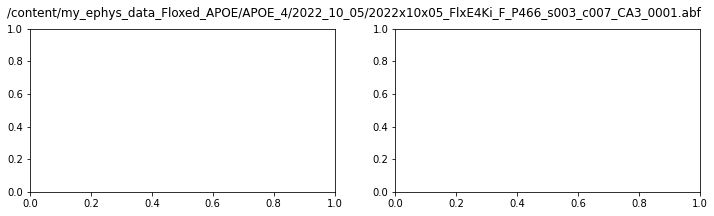

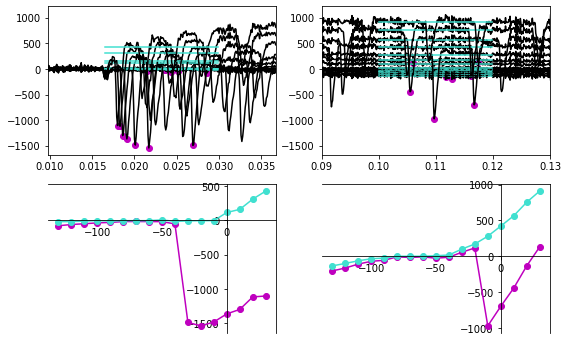

 82%|████████▏ | 212/260 [02:48<00:40,  1.19it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c007_CA3_0003.abf
analysis failed


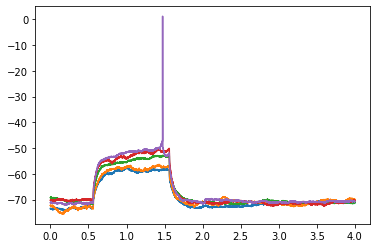

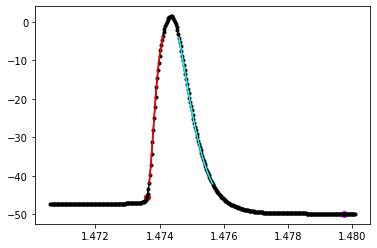

 82%|████████▏ | 213/260 [02:50<01:00,  1.28s/it]

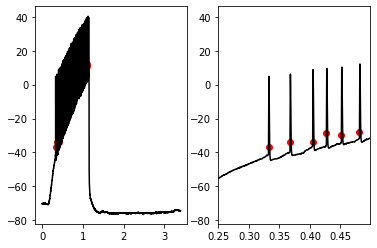

 83%|████████▎ | 215/260 [02:52<00:47,  1.05s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c007_CA3_0007.abf
analysis failed


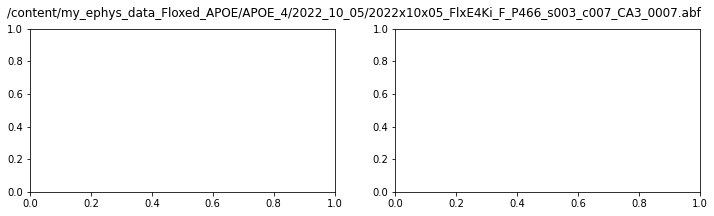

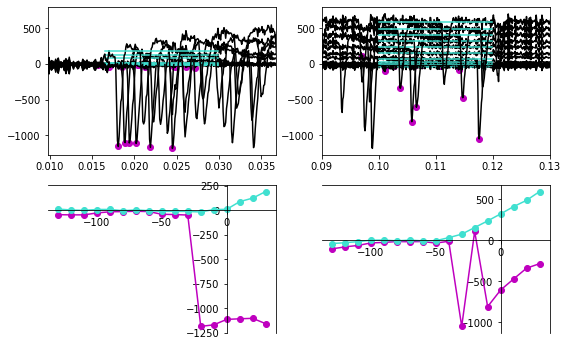

 83%|████████▎ | 217/260 [02:53<00:35,  1.22it/s]

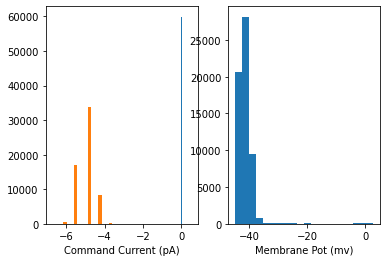

 84%|████████▍ | 218/260 [02:53<00:30,  1.37it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c008_CA3_0001.abf
analysis failed


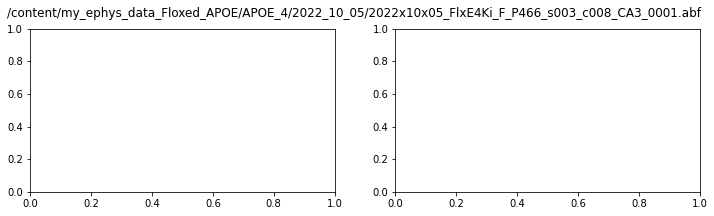

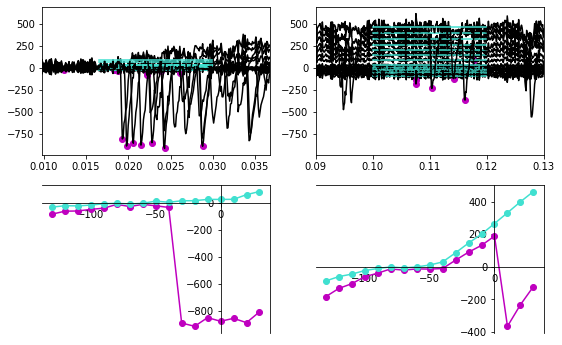

 85%|████████▌ | 221/260 [02:56<00:33,  1.18it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c008_CA3_0003.abf
analysis failed


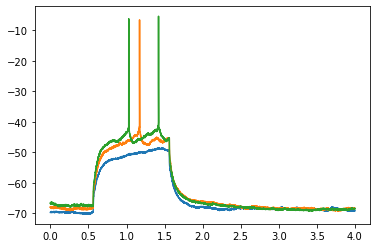

 86%|████████▌ | 223/260 [02:57<00:23,  1.58it/s]

no spikes found
no spikes found


 86%|████████▌ | 224/260 [02:57<00:19,  1.88it/s]

no spikes found


 87%|████████▋ | 225/260 [02:58<00:23,  1.50it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c008_CA3_0008.abf
analysis failed


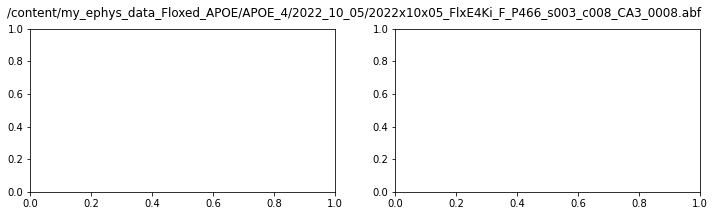

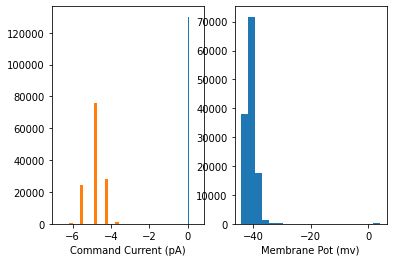

 87%|████████▋ | 227/260 [02:59<00:16,  2.03it/s]

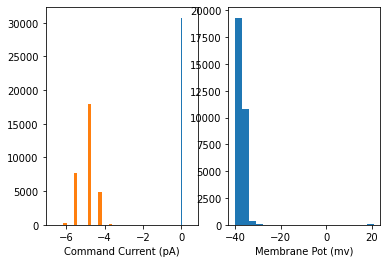

 88%|████████▊ | 228/260 [02:59<00:15,  2.11it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c009_CA3_0001.abf
analysis failed


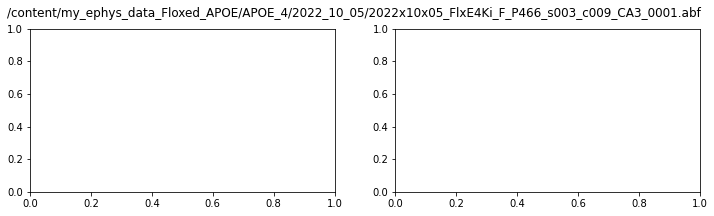

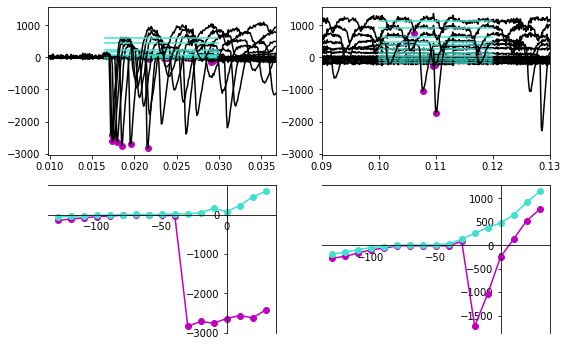

 89%|████████▉ | 231/260 [03:02<00:21,  1.37it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c009_CA3_0003.abf
analysis failed


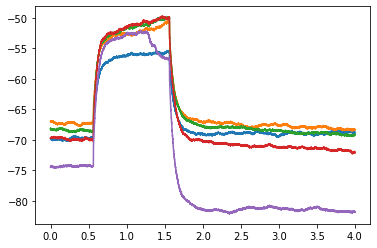

 89%|████████▉ | 232/260 [03:03<00:21,  1.28it/s]

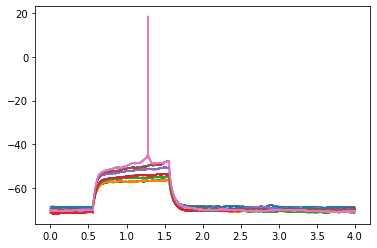

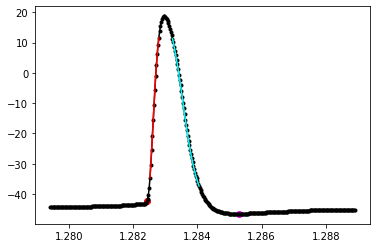

 90%|████████▉ | 233/260 [03:06<00:37,  1.37s/it]

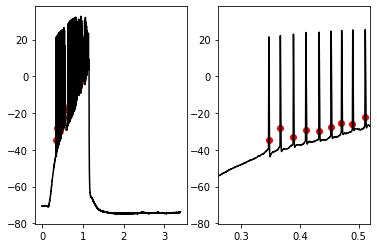

 90%|█████████ | 234/260 [03:06<00:29,  1.12s/it]

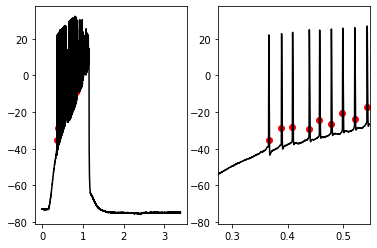

 91%|█████████ | 236/260 [03:08<00:23,  1.02it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s003_c009_CA3_0009.abf
analysis failed


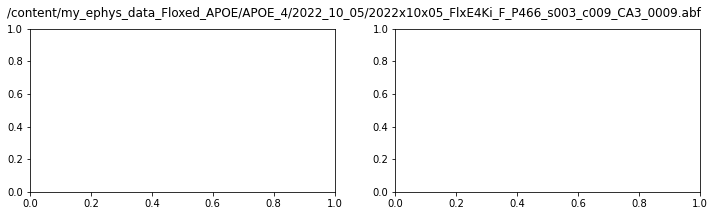

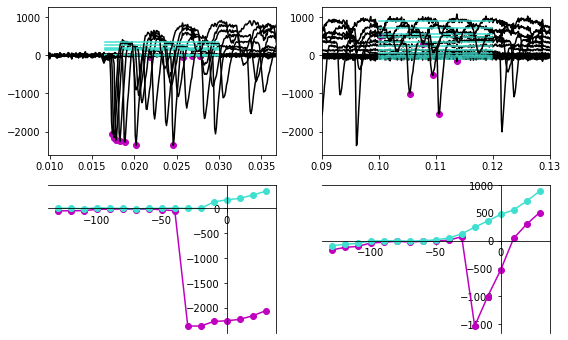

 92%|█████████▏| 238/260 [03:09<00:16,  1.30it/s]

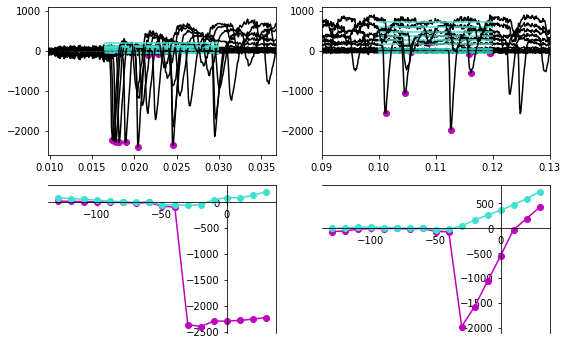

 92%|█████████▏| 240/260 [03:09<00:12,  1.60it/s]

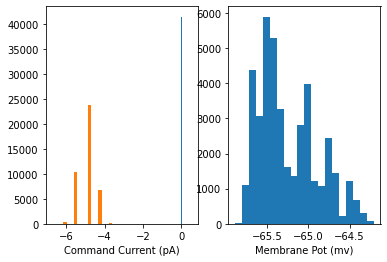

 93%|█████████▎| 241/260 [03:10<00:10,  1.77it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c010_CA3_0001.abf
analysis failed


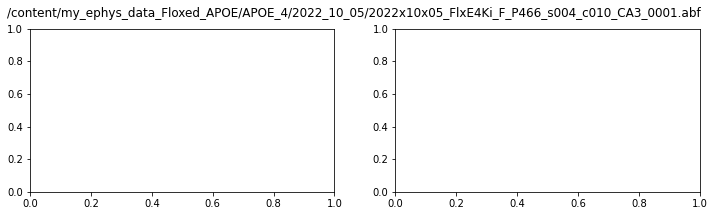

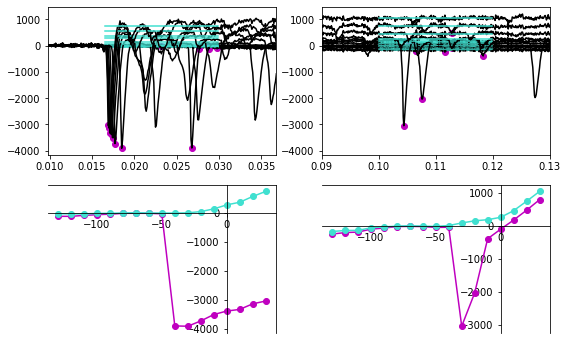

 94%|█████████▍| 244/260 [03:12<00:12,  1.29it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c010_CA3_0003.abf
analysis failed


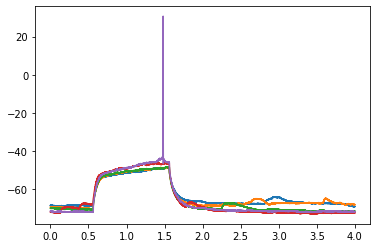

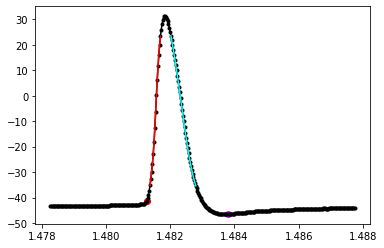

 94%|█████████▍| 245/260 [03:15<00:18,  1.23s/it]

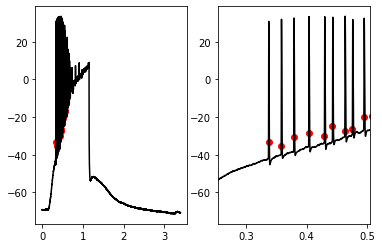

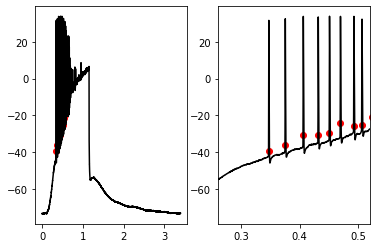

 95%|█████████▌| 247/260 [03:17<00:14,  1.10s/it]

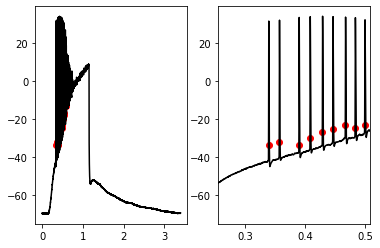

 95%|█████████▌| 248/260 [03:17<00:10,  1.11it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c010_CA3_0008.abf
analysis failed


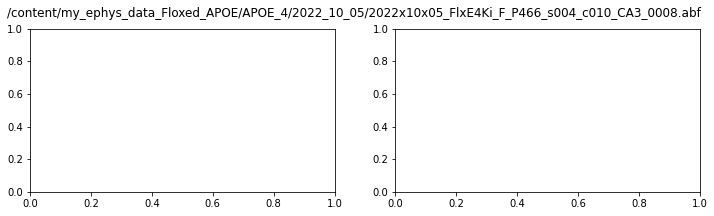

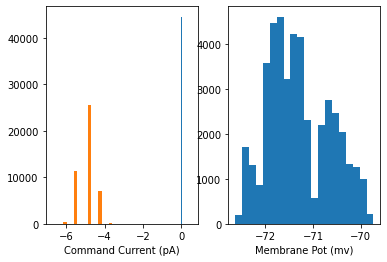

 97%|█████████▋| 251/260 [03:18<00:04,  1.94it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c011_CA3_0001.abf
analysis failed


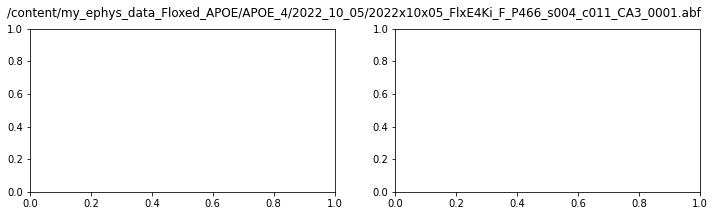

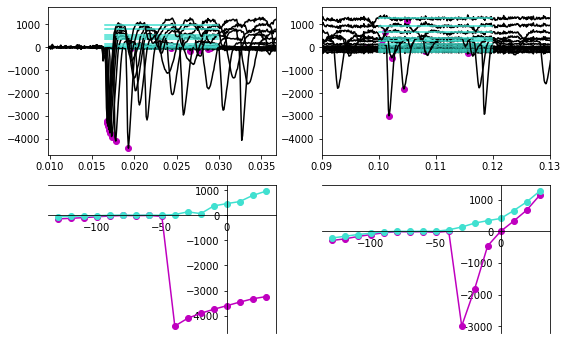

 97%|█████████▋| 253/260 [03:21<00:06,  1.14it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c011_CA3_0003.abf
analysis failed


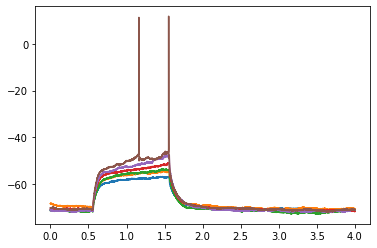

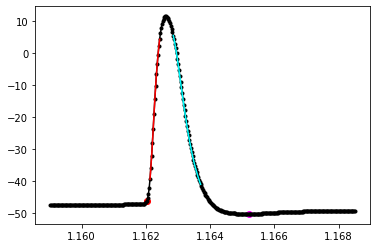

 98%|█████████▊| 254/260 [03:23<00:08,  1.41s/it]

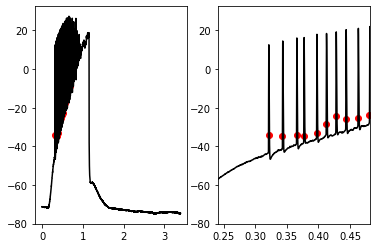

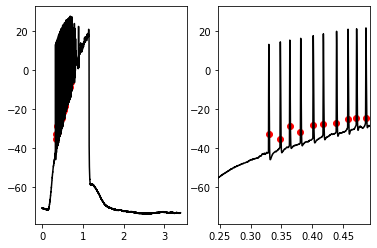

 98%|█████████▊| 256/260 [03:25<00:04,  1.18s/it]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c011_CA3_0007.abf
analysis failed


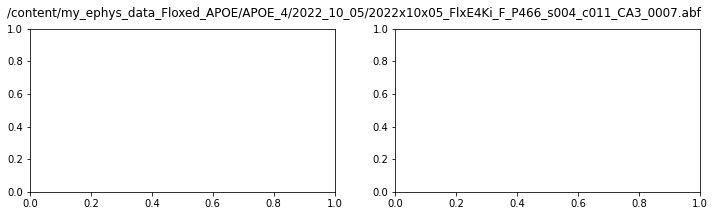

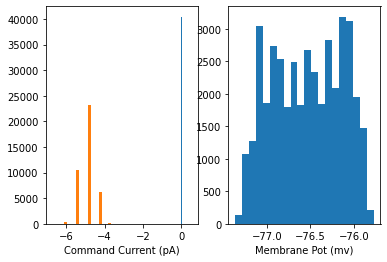

 99%|█████████▉| 258/260 [03:26<00:01,  1.26it/s]


 error on:  my_ephys_data_Floxed_APOE/APOE_4/2022_10_05/2022x10x05_FlxE4Ki_F_P466_s004_c012_CA3_0001.abf
analysis failed


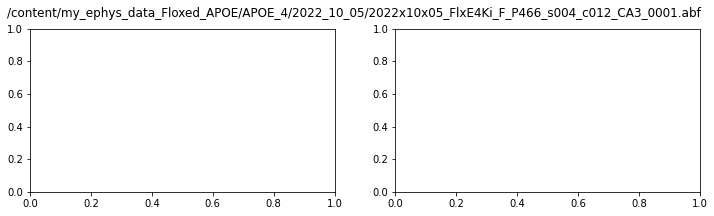

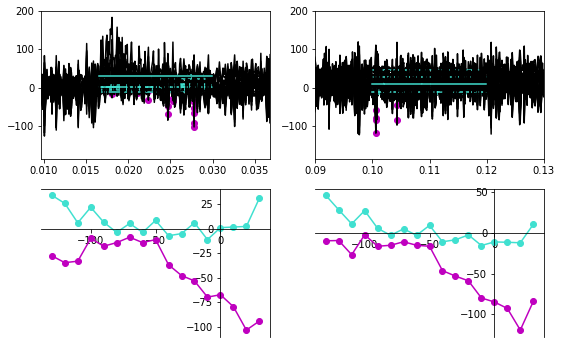

100%|██████████| 260/260 [03:27<00:00,  1.25it/s]


problem_recs
  adding: content/Saved_Figs/ (stored 0%)
  adding: content/Saved_Figs/Rheobase/ (stored 0%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x05_FlxE4Ki_F_P466_s002_c005_CA3_0012.png (deflated 10%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x07_FlxE2Ki_F_P480_s003_c007_CA3_0005.png (deflated 8%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x05_FlxE4Ki_F_P466_s003_c007_CA3_0004.png (deflated 8%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x05_FlxE4Ki_F_P466_s004_c011_CA3_0004.png (deflated 7%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x07_FlxE2Ki_F_P480_s001_c003_CA3_0004.png (deflated 6%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x05_FlxE4Ki_F_P466_s003_c009_CA3_0005.png (deflated 9%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x05_FlxE4Ki_F_P466_s002_c006_CA3_0004.png (deflated 10%)
  adding: content/Saved_Figs/Rheobase/Rheobase_2022x10x05_FlxE4Ki_F_P466_s003_c008_CA3_0004.png (deflated 7%)
  adding: co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyError: ignored

In [3]:
dataset = {'data_name': 'Floxed_APOE',
           'data_source': "https://www.dropbox.com/sh/x4mmoozuo0dp1ed/AAB5Nz3_vSg3wqnfqwgrjNGKa?dl=0",
           'file_naming_scheme': ['Recording_date','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

results = ephys_wrapper(dataset,VC_prot,IC_prot,strat_cols=['GenoType', 'Cell_Type'])

In [ ]:
strat_df_dict = results['strat_df_dict']

labels = ['Rec_date', 'Virus', 'GenoType', 'Sex', 'Age', 'Slice_Num', 'Cell_num', 'Cell_Type']

possible_cols = list(strat_df_dict[list(strat_df_dict.keys())[0]].columns)
alt_strat_groups = ['Cm_pc_10.0',
                    'Ra_160.0',
                    'Rm_160.0',
                    'Cmq_160.0',
                    'Gain_(Hz/pA)',
                    'Rheobase',
                    'AP_thresh_US',
                    'fast_after_hyperpol',
                    'Spike_latency_(ms)',
                    'Input_Resistance_MO',
                    'Rmp_mV',
                    [c for c in possible_cols if 'Stim_Levels_(pA)' in c],
                    [c for c in possible_cols if 'Spike_Counts' in c],
                    [c for c in possible_cols if 'IV_Early_(V_stim)' in c],
                    [c for c in possible_cols if 'IV_Steady_State_(I_mean)' in c],
                    [c for c in possible_cols if 'IV_Early_(I_peak)' in c],
                    ]

alt_strat_dict = restrat(strat_df_dict,alt_strat_groups  )
write_strat_dfs(alt_strat_dict, dataset['data_name']+'_results_stratified_alternate')